## Investigate trends and patterns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
import re

import csv
import datetime
import pickle
import os

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

from random import randint

In [3]:
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.options.display.float_format = '{:.0f}'.format

In [4]:
DATA_ROOT_DIR='/mnt/data/projects/MD3'
PROJ_ROOT_DIR='/home/priyesh/projects/MD3'

In [5]:
filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_income_sheets_final_stage6.pkl')
income_sheets = pd.read_pickle(filepath)
filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_cash_sheets_final_stage6.pkl')
cash_sheets = pd.read_pickle(filepath)
filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_balance_sheets_final_stage6.pkl')
balance_sheets = pd.read_pickle(filepath)

In [6]:
list(cash_sheets.columns)

['company',
 'yahoo_sector',
 'gics_sector',
 'industry',
 'st_date',
 'st_YR',
 'st_Mnth',
 'netIncome',
 'netIncomeFromContinuingOperations',
 'depreciation',
 'stockBasedCompensation',
 'cashFlowOperatingActivities',
 'capitalExpenditure',
 'saleOfBusiness',
 'purchaseOfBusiness',
 'netBusinessPurchaseAndSale',
 'saleOfPPE',
 'purchaseOfPPE',
 'netPPEPurchaseAndSale',
 'saleOfInvestment',
 'purchaseOfInvestment',
 'netInvestmentPurchaseAndSale',
 'saleOfInvestmentProperties',
 'purchaseOfInvestmentProperties',
 'netInvestmentPropertiesPurchaseAndSale',
 'saleOfIntangibles',
 'purchaseOfIntangibles',
 'netIntangiblesPurchaseAndSale',
 'netOtherInvestingChanges',
 'cashFlowInvestingActivities',
 'netIssuancePaymentsOfDebt',
 'netLongTermDebtIssuance',
 'netShortTermDebtIssuance',
 'commonStockDividendPaid',
 'preferredStockDividendPaid',
 'cashDividendsPaid',
 'netCommonStockIssuance',
 'netPreferredStockIssuance',
 'repurchaseOfCapitalStock',
 'netOtherFinancingCharges',
 'cashFlowFi

In [6]:
income_sheets = income_sheets.fillna(0)
cash_sheets = cash_sheets.fillna(0)
balance_sheets = balance_sheets.fillna(0)

In [ ]:
balance_sheets['totalDebt'] = balance_sheets['currentDebt'] + balance_sheets['longTermDebt']
balance_sheets['totalAssets'] = balance_sheets['currentAssets'] + balance_sheets['totalNonCurrentAssets']
balance_sheets['totalLiabilities'] = balance_sheets['currentLiabilities'] + balance_sheets['totalNonCurrentLiabilities']
balance_sheets['workingCapital'] = balance_sheets['currentAssets'] - balance_sheets['currentLiabilities']

In [7]:
df = balance_sheets[balance_sheets['company'] == 'WMT']

In [83]:
balance_sheets

,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,cashEquivalents,receivables,finishedGoods,workInProcess,rawMaterials,otherCurrentAssets,inventory,currentAssets,netPPE,otherNonCurrentAssets,financialAssets,goodwill,nonCurrentAccountsReceivable,totalNonCurrentAssets,currentDebt,payablesAndAccruedExpenses,totalTaxPayable,otherCurrentLiabilities,currentLiabilities,longTermDebt,longTermDebtAndCapitalLeaseObligation,totalNonCurrentLiabilities,retainedEarnings,stockholdersEquity,totalDebt,totalAssets,totalLiabilities,workingCapital,quickRatio,currentRatio,debtEquityRatio,debtCapitalRatio,debtAssetRatio,FinancialLeverageRatio
0,AM,Energy,Energy,Oil & Gas Midstream,2019-12-31,2019,12,1235000.00,105603000.00,0.00,0.00,0.00,1720000.00,0.00,108558000.00,3273410000.00,14460000.00,0.00,2073580000.00,0.00,6174320000.00,0.00,113979000.00,0.00,128105000.00,242084000.00,2892249000.00,2892249000.00,2897380000.00,-341565000.00,3143414000.00,2892249000.00,6282878000.00,3139464000.00,-133526000.00,0.45,0.45,0.92,0.48,0.46,2.00
1,AM,Energy,Energy,Oil & Gas Midstream,2020-12-31,2020,12,640000.00,91812000.00,0.00,0.00,0.00,1479000.00,0.00,93931000.00,3254044000.00,9610000.00,0.00,1427447000.00,0.00,5516981000.00,0.00,88304000.00,3368000.00,5701000.00,94005000.00,3091626000.00,3091626000.00,3098621000.00,-464092000.00,2418286000.00,3091626000.00,5610912000.00,3192626000.00,-74000.00,1.00,1.00,1.28,0.56,0.55,2.32
2,AM,Energy,Energy,Oil & Gas Midstream,2021-12-31,2021,12,0.00,82884000.00,0.00,0.00,0.00,920000.00,0.00,83804000.00,3394746000.00,12667000.00,0.00,1356775000.00,0.00,5460197000.00,0.00,109386000.00,5400000.00,4623000.00,114009000.00,3122910000.00,3122910000.00,3143294000.00,-132475000.00,2286698000.00,3122910000.00,5544001000.00,3257303000.00,-30205000.00,0.74,0.74,1.37,0.58,0.56,2.42
3,AM,Energy,Energy,Oil & Gas Midstream,2022-12-31,2022,12,0.00,87667000.00,0.00,0.00,0.00,1326000.00,0.00,88993000.00,3751431000.00,12026000.00,0.00,1286103000.00,0.00,5702327000.00,0.00,101016000.00,5661000.00,1061000.00,102077000.00,3361282000.00,3361282000.00,3496925000.00,82793000.00,2192318000.00,3361282000.00,5791320000.00,3599002000.00,-13084000.00,0.87,0.87,1.53,0.61,0.58,2.64
8,APA,Energy,Energy,Oil & Gas E&P,2019-12-31,2019,12,247000000.00,1062000000.00,0.00,0.00,0.00,1714000000.00,502000000.00,1961000000.00,14158000000.00,1988000000.00,0.00,0.00,0.00,16146000000.00,11000000.00,1360000000.00,51000000.00,1844000000.00,1855000000.00,8555000000.00,8555000000.00,11787000000.00,-5601000000.00,3255000000.00,8566000000.00,18107000000.00,13642000000.00,106000000.00,0.79,1.06,2.63,0.72,0.47,5.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,ZBH,Healthcare,Health Care,Medical Devices,2022-12-31,2022,12,375700000.00,1381500000.00,1655000000.00,230900000.00,261300000.00,522900000.00,2147200000.00,4427300000.00,1872500000.00,1122200000.00,0.00,13644000000.00,0.00,16638700000.00,544300000.00,974900000.00,38500000.00,1813900000.00,2358200000.00,5152200000.00,5152200000.00,6680800000.00,9559300000.00,12021300000.00,5696500000.00,21066000000.00,9039000000.00,2069100000.00,0.97,1.88,0.47,0.32,0.27,1.75
3360,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2019-12-31,2019,12,1932000000.00,1086000000.00,701000000.00,511000000.00,198000000.00,318000000.00,1410000000.00,4748000000.00,2129000000.00,98000000.00,0.00,4482000000.00,0.00,6797000000.00,500000000.00,975000000.00,36000000.00,55000000.00,1806000000.00,5947000000.00,6111000000.00,7031000000.00,4427000000.00,2708000000.00,6447000000.00,11545000000.00,8837000000.00,2942000000.00,1.85,2.63,2.38,0.70,0.56,4.26
3361,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2020-12-31,2020,12,3602000000.00,1013000000.00,805000000.00,594000000.00,229000000.00,366000000.00,1628000000.00,6611000000.00,2394000000.00,106000000.00,0.00,4404000000.00,0.00,699800000

In [84]:
income_sheets.columns

Index(['company', 'yahoo_sector', 'gics_sector', 'industry', 'st_date',
       'st_YR', 'st_Mnth', 'totalRevenue', 'costOfRevenue', 'grossProfit',
       'netIncome', 'operatingIncome', 'netIncomeContinuousOperations',
       'netInterestIncome', 'otherIncomeExpense', 'operatingExpense',
       'totalExpenses', 'taxProvision', 'sellingGeneralAndAdministration',
       'researchAndDevelopment', 'ebit'],
      dtype='object')

In [82]:
ticker_list = income_sheets['company'].unique()

In [ ]:
## Calculate Ratios

In [109]:
balance_sheets['quickRatio'] = (balance_sheets['currentAssets'] - balance_sheets['inventory']) / balance_sheets['currentLiabilities']
balance_sheets['currentRatio'] = balance_sheets['currentAssets'] / balance_sheets['currentLiabilities']
balance_sheets['debtCapitalRatio'] = 100 * balance_sheets['totalDebt'] / (balance_sheets['totalDebt'] + balance_sheets['stockholdersEquity'])
balance_sheets['debtAssetRatio'] = 100 * balance_sheets['totalDebt'] / balance_sheets['totalAssets']
balance_sheets['FinancialLeverageRatio'] = 100 * balance_sheets['totalAssets'] / balance_sheets['stockholdersEquity']

In [110]:
balance_sheets['debtCapitalRatio']

0      47.92
1      56.11
2      57.73
3      60.52
8      72.46
        ... 
3359   32.15
3360   70.42
3361   65.64
3362   59.20
3363   64.21
Name: debtCapitalRatio, Length: 2892, dtype: float64

In [9]:
def chk_trend(S):
  
  S = pd.DataFrame(S)

  trend_details={}

  scaler = preprocessing.MinMaxScaler()
  scaler = scaler.fit_transform(S)* 10
  x=[1,2,3,4]

  y=[]

  for i in range(0,len(scaler)):
    y = y + list(scaler[i])

  coeff=np.polyfit(x,y,deg=1)
  f = np.poly1d(coeff)

    
  trend_details['gradient'] = coeff[0]
  trend_details['x_val'] = x
  trend_details['y_val'] = y
    
  return trend_details

In [10]:
def getTrendScore(S):

   trend_details = chk_trend(S)

   return round(trend_details['gradient'])

In [11]:
trend_details = chk_trend(df['stockholdersEquity'])

In [ ]:
def show_trend(trend_details,deg=1):
 
  x = trend_details['x_val']
  y = trend_details['y_val']
  print(x)
  print(y)

  xx=np.linspace(0,5,100)

  # Linear

  deg = 1

  coeff=np.polyfit(x,y,deg)
  f = np.poly1d(coeff)
  y1 = f(x)
  y1_line=f(xx)

  y1_error = mean_squared_error(y,y1)   
  print("y1_error: %.2f" % y1_error)

  # Polynominal 1

  deg = 2
  coeff=np.polyfit(x,y,deg)
  f = np.poly1d(coeff)
  y2 = f(x)
  y2_line=f(xx)

  y2_error = mean_squared_error(y,y2)   
  print("y2_error: %.2f" % y2_error)
    
  # Polynomial 2

  deg = 3
    
  coeff=np.polyfit(x,y,deg)
  f = np.poly1d(coeff)
  y3 = f(x)
  y3_line=f(xx)

  y3_error = mean_squared_error(y,y3)   
  print("y3_error: %.2f" % y3_error)
  print(" ")

  plt.plot(xx,y1_line, c='red')
  plt.plot(xx,y2_line, c='green')
  plt.plot(xx,y3_line, c='red')
    
  plt.scatter(x,y,c="black")

  plt.show()


In [13]:
trend_details = chk_trend()

{'gradient': 0.935111835973902,
 'x_val': [1, 2, 3, 4],
 'y_val': [0.0, 7.722506989748368, 10.0, 2.357875116495798]}

[1, 2, 3, 4]
[0.0, 7.722506989748368, 10.0, 2.357875116495798]
y1_error: 15.00
y2_error: 0.25
y3_error: 0.00
 


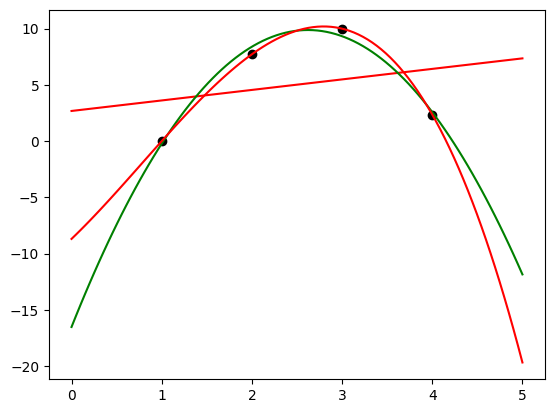

In [14]:
show_trend(trend_details,1)

In [111]:
# Rename columns

balance_sheets = balance_sheets.rename(
                      columns={'cashCashEquivalentsAndShortTermInvestments':'cashEquivalents',
                               'goodwillAndOtherIntangibleAssets':'goodwill',
                               'currentDebtAndCapitalLeaseObligation':'currentDebt',
                               'totalNonCurrentLiabilitiesNetMinorityInterest':'totalNonCurrentLiabilities'})

In [112]:
ticker_list = income_sheets['company'].unique()

company = {}

for ticker in ticker_list:
  print(ticker)
  company[ticker] = {}
  company[ticker]['income'] = income_sheets[income_sheets['company'] == ticker]
  company[ticker]['cash'] = cash_sheets[cash_sheets['company'] == ticker]
  company[ticker]['balance'] = balance_sheets[balance_sheets['company'] == ticker]

AM
APA
BKR
LNG
CVX
COP
CTRA
DVN
FANG
DTM
EVA
EOG
EQT
XOM
HAL
HES
DINO
KMI
MRO
MPC
NFE
NOV
OXY
OKE
OVV
PDCE
PSX
PXD
RRC
SLB
SWN
TRGP
TPL
VLO
WMB
AES
LNT
AEE
AEP
AWK
ATO
AGR
CNP
CMS
ED
CEG
D
DTE
DUK
EIX
ETR
WTRG
EVRG
ES
EXC
FE
HE
IDA
MDU
NFG
NEE
NI
NRG
OGE
PCG
PNW
PPL
PEG
SRE
SO
UGI
VST
WEC
XEL
ATVI
GOOG
ATUS
AMC
T
CABO
CHTR
CMCSA
DISH
DIS
EA
FOX
IAC
IPG
LBRDA
LYV
LUMN
MSGS
MTCH
META
NFLX
NYT
NWS
NXST
OMC
PARA
PINS
PLTK
RBLX
ROKU
SIRI
SPOT
TMUS
TTWO
TRIP
VZ
WBD
WWE
ZI
ADM
ACI
MO
BJ
SAM
BG
CPB
CHD
CLX
KO
CL
STZ
COST
COTY
DAR
DG
DLTR
EL
FLO
FRPT
GO
HSY
HRL
INGR
K
KDP
KMB
KHC
KR
MKC
TAP
MDLZ
MNST
OLPX
PEP
PFGC
PM
PPC
POST
PG
REYN
SEB
SJM
SPB
SYY
TGT
TSN
USFD
WBA
WMT
APD
ALB
AA
AMCR
ATR
ASH
AVY
AXTA
BALL
BERY
CE
CF
CC
CLF
CTVA
CCK
DOW
DD
EXP
EMN
ECL
ESI
FMC
FCX
GPK
HUN
IFF
IP
LIN
LPX
LYB
MLM
MOS
MP
NEU
NEM
NUE
OLN
PKG
PPG
RS
SMG
SEE
SHW
SLGN
SON
SCCO
SSRM
STLD
X
VVV
VMC
WLK
WRK
Z
MMM
AYI
ADP
WMS
ACM
AGCO
AL
ALK
ALLE
ALSN
AAL
AME
AWI
CAR
AXON
AZEK
BA
BAH
BR
BLDR
BWXT
CHRW
CSL
CARR
CLVT
CLH
CP

[1, 2, 3, 4]
[10.0, 0.0, 1.9633336697988546, 5.699637993686684]
y1_error: 13.09
y2_error: 1.30
y3_error: 0.00
 


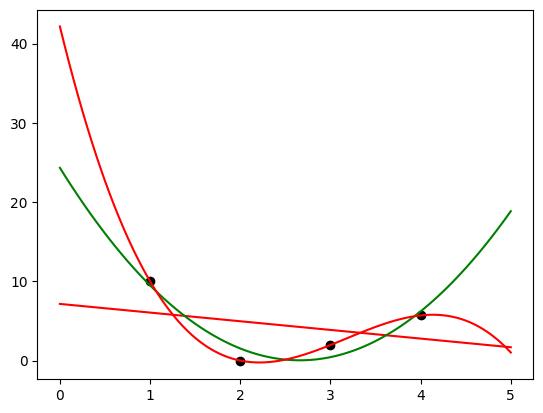

In [18]:
loc = randint(0,len(ticker_list))

trend_details = chk_trend(company[ticker_list[loc]]['income']['grossProfit'])
show_trend(trend_details)

[1, 2, 3, 4]
[4.984615384615385, 10.0, 1.6594871794871802, 0.0]
y1_error: 7.80
y2_error: 5.02
y3_error: 0.00
 


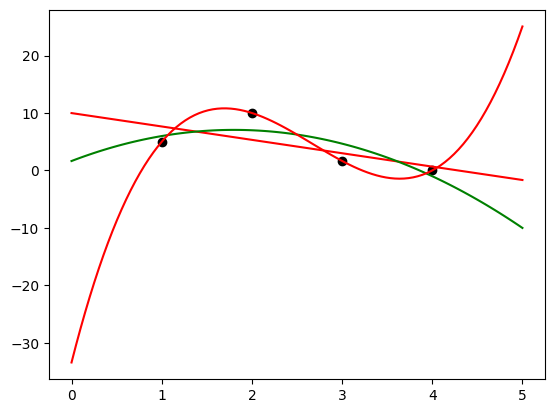

In [131]:
trend_details = chk_trend(company['PEP']['balance']['workingCapital'])
show_trend(trend_details)

In [19]:
income_sheets

,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,netIncomeContinuousOperations,netInterestIncome,otherIncomeExpense,operatingExpense,totalExpenses,taxProvision,sellingGeneralAndAdministration,researchAndDevelopment,ebit
0,AM,Energy,Energy,Oil & Gas Midstream,2022-12-31,2022,12,990657000,382688000,607969000,326242000,540917000,326242000,-189948000,92767000,67052000,449740000,117494000,62125000,0,633684000
2,AM,Energy,Energy,Oil & Gas Midstream,2019-12-31,2019,12,849598000,348354000,501244000,-355114000,371543000,-355114000,-110402000,-718721000,129701000,478055000,-102466000,118113000,0,-347178000
3,AM,Energy,Energy,Oil & Gas Midstream,2020-12-31,2020,12,971391000,344848000,626543000,-122527000,558931000,-122527000,-147007000,-590139000,67612000,412460000,-55688000,52213000,0,-31208000
4,AM,Energy,Energy,Oil & Gas Midstream,2021-12-31,2021,12,234158000,84254000,149904000,78626000,131980000,78626000,-44366000,19588000,17924000,102178000,28576000,16847000,0,151568000
10,APA,Energy,Energy,Oil & Gas E&P,2019-12-31,2019,12,6315000000,4433000000,1882000000,-3515000000,410000000,-3682000000,-462000000,-2956000000,1472000000,5905000000,674000000,406000000,0,-2546000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,ZBH,Healthcare,Health Care,Medical Devices,2022-12-31,2022,12,6939900000,2019500000,4920400000,231400000,1192100000,291200000,-164800000,-623800000,3728300000,5747800000,112300000,2761700000,406000000,568300000
4406,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2019-12-31,2019,12,6260000000,1992000000,4268000000,1500000000,2018000000,1500000000,-223000000,6000000,2250000000,4242000000,301000000,1638000000,457000000,2024000000
4407,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2020-12-31,2020,12,6675000000,2057000000,4618000000,1638000000,2269000000,1636000000,-219000000,-54000000,2349000000,4406000000,360000000,1726000000,463000000,2227000000
4408,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2021-12-31,2021,12,7776000000,2303000000,5473000000,2037000000,2803000000,2034000000,-224000000,-91000000,2670000000,4973000000,454000000,2001000000,508000000,2712000000


In [20]:
list(income_sheets.columns)

['company',
 'yahoo_sector',
 'gics_sector',
 'industry',
 'st_date',
 'st_YR',
 'st_Mnth',
 'totalRevenue',
 'costOfRevenue',
 'grossProfit',
 'netIncome',
 'operatingIncome',
 'netIncomeContinuousOperations',
 'netInterestIncome',
 'otherIncomeExpense',
 'operatingExpense',
 'totalExpenses',
 'taxProvision',
 'sellingGeneralAndAdministration',
 'researchAndDevelopment',
 'ebit']

(array([609., 541., 356., 219., 174., 140., 124.,  84.,  89.,  69.,  52.,
         43.,  35.,  28.,  25.,  21.,  22.,   7.,  11.,   5.,   7.,  11.,
         11.,   8.,   7.,  10.,   4.,   5.,   5.,   6.,   6.,   6.,   6.,
          6.,   6.,   3.,   3.,   5.,   5.,   6.,   4.,   2.,   2.,   0.,
          1.,   2.,   5.,   3.,   0.,   4.,   2.,   0.,   2.,   3.,   2.,
          1.,   0.,   3.,   1.,   2.,   3.,   1.,   2.,   1.,   2.,   4.,
          1.,   4.,   2.,   0.,   1.,   1.,   1.,   0.,   2.,   1.,   3.,
          2.,   0.,   2.,   0.,   1.,   2.,   1.,   1.,   0.,   1.,   1.,
          2.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,
          0.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

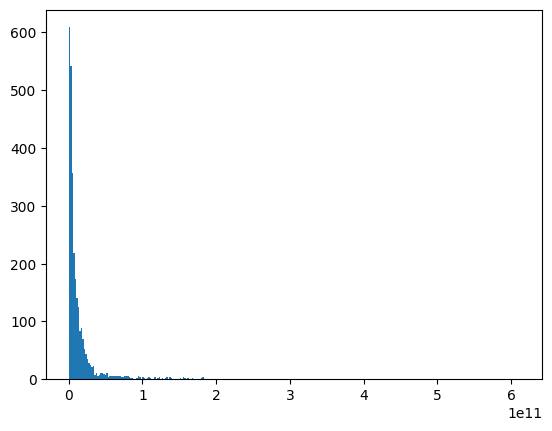

In [21]:
plt.hist(income_sheets['totalRevenue'],bins=300)

In [22]:
income_sheets
df = income_sheets.where(income_sheets['totalRevenue'] < 100000)

(array([2.000e+00, 2.000e+00, 3.000e+00, 1.000e+01, 1.006e+03, 8.340e+02,
        3.440e+02, 1.740e+02, 1.190e+02, 6.200e+01, 7.700e+01, 4.300e+01,
        2.300e+01, 1.100e+01, 1.400e+01, 2.500e+01, 1.700e+01, 1.000e+01,
        6.000e+00, 8.000e+00, 4.000e+00, 9.000e+00, 1.200e+01, 1.000e+00,
        5.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 7.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 5.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

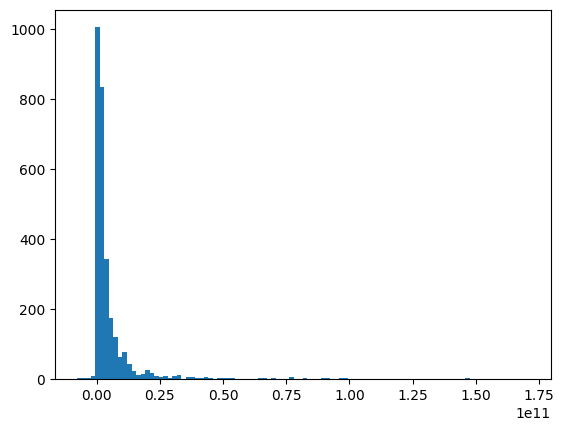

In [23]:
plt.hist(income_sheets['grossProfit'],bins=100)

In [85]:
mask = income_sheets['company'] == 'WMT'
df = income_sheets[mask]

In [86]:
df

,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,netIncomeContinuousOperations,netInterestIncome,otherIncomeExpense,operatingExpense,totalExpenses,taxProvision,sellingGeneralAndAdministration,researchAndDevelopment,ebit
929,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2020-01-31,2020,01,523964000000.00,394605000000.00,129359000000.00,14881000000.00,20568000000.00,15201000000.00,-2410000000.00,1958000000.00,108791000000.00,503396000000.00,4915000000.00,108791000000.00,0.00,22715000000.00
930,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2021-01-31,2021,01,559151000000.00,420315000000.00,138836000000.00,13510000000.00,22548000000.00,13706000000.00,-2194000000.00,210000000.00,116288000000.00,536603000000.00,6858000000.00,116288000000.00,0.00,22879000000.00
931,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2022-01-31,2022,01,572754000000.00,429000000000.00,143754000000.00,13673000000.00,25942000000.00,13940000000.00,-1836000000.00,-5410000000.00,117812000000.00,546812000000.00,4756000000.00,117812000000.00,0.00,20690000000.00
932,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2023-01-31,2023,01,611289000000.00,463721000000.00,147568000000.00,11680000000.00,20428000000.00,11292000000.00,-1874000000.00,-1538000000.00,127140000000.00,590861000000.00,5724000000.00,127140000000.00,0.00,19144000000.00


## Income Sheet Analysis

In [25]:
income_sheets

,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,netIncomeContinuousOperations,netInterestIncome,otherIncomeExpense,operatingExpense,totalExpenses,taxProvision,sellingGeneralAndAdministration,researchAndDevelopment,ebit
0,AM,Energy,Energy,Oil & Gas Midstream,2022-12-31,2022,12,990657000,382688000,607969000,326242000,540917000,326242000,-189948000,92767000,67052000,449740000,117494000,62125000,0,633684000
2,AM,Energy,Energy,Oil & Gas Midstream,2019-12-31,2019,12,849598000,348354000,501244000,-355114000,371543000,-355114000,-110402000,-718721000,129701000,478055000,-102466000,118113000,0,-347178000
3,AM,Energy,Energy,Oil & Gas Midstream,2020-12-31,2020,12,971391000,344848000,626543000,-122527000,558931000,-122527000,-147007000,-590139000,67612000,412460000,-55688000,52213000,0,-31208000
4,AM,Energy,Energy,Oil & Gas Midstream,2021-12-31,2021,12,234158000,84254000,149904000,78626000,131980000,78626000,-44366000,19588000,17924000,102178000,28576000,16847000,0,151568000
10,APA,Energy,Energy,Oil & Gas E&P,2019-12-31,2019,12,6315000000,4433000000,1882000000,-3515000000,410000000,-3682000000,-462000000,-2956000000,1472000000,5905000000,674000000,406000000,0,-2546000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,ZBH,Healthcare,Health Care,Medical Devices,2022-12-31,2022,12,6939900000,2019500000,4920400000,231400000,1192100000,291200000,-164800000,-623800000,3728300000,5747800000,112300000,2761700000,406000000,568300000
4406,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2019-12-31,2019,12,6260000000,1992000000,4268000000,1500000000,2018000000,1500000000,-223000000,6000000,2250000000,4242000000,301000000,1638000000,457000000,2024000000
4407,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2020-12-31,2020,12,6675000000,2057000000,4618000000,1638000000,2269000000,1636000000,-219000000,-54000000,2349000000,4406000000,360000000,1726000000,463000000,2227000000
4408,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2021-12-31,2021,12,7776000000,2303000000,5473000000,2037000000,2803000000,2034000000,-224000000,-91000000,2670000000,4973000000,454000000,2001000000,508000000,2712000000


In [18]:
list(income_sheets.columns)


['company',
 'yahoo_sector',
 'gics_sector',
 'industry',
 'st_date',
 'st_YR',
 'st_Mnth',
 'totalRevenue',
 'costOfRevenue',
 'grossProfit',
 'netIncome',
 'operatingIncome',
 'netIncomeContinuousOperations',
 'netInterestIncome',
 'otherIncomeExpense',
 'operatingExpense',
 'totalExpenses',
 'taxProvision',
 'sellingGeneralAndAdministration',
 'researchAndDevelopment',
 'ebit']

In [19]:
cols = ['totalRevenue',
        'costOfRevenue',
        'grossProfit',
        'netIncome',
        'operatingIncome',
        'netIncomeContinuousOperations',
        'netInterestIncome',
        'otherIncomeExpense',
        'operatingExpense',
        'totalExpenses',
        'taxProvision',
        'sellingGeneralAndAdministration',
        'researchAndDevelopment',
        'ebit']
df_median = income_sheets.groupby(['company','industry'])[cols].median().reset_index()
df_median

,company,industry,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,sellingGeneralAndAdministration,researchAndDevelopment,ebit
0,A,Diagnostics & Research,5829000000,2707000000,3122000000,1140500000,1144000000,1557500000,454000000,1217000000
1,AA,Aluminum,11292500000,8845000000,2067500000,-136000000,1103500000,216500000,29000000,563500000
2,AAL,Airlines,37825000000,32617000000,4532000000,-933000000,-1651000000,1350000000,0,700000000
3,AAP,Specialty Retail,10552155000,5846974000,4705181000,497446500,732029000,3910869000,0,698824000
4,AAPL,Consumer Electronics,320166000000,191270000000,128896000000,76045500000,87618500000,20944500000,20333000000,87618500000
5,ABBV,Drug Manufacturers—General,51000500000,16400500000,34584000000,9712000000,16091000000,11824000000,6533500000,14370500000
6,ABC,Medical Distribution,201941384500,195873828500,6067556000,1197648500,2393557500,3180734000,0,1759302500
7,ABNB,Travel Services,5398499500,1176073000,4222426500,-513186500,20311500,2314438000,1463524000,-132171500
8,ABT,Medical Devices,38841500000,16770000000,22058000000,5714000000,6859500000,10506500000,2591000000,7074500000
9,ACHC,Medical Care Facilities,2462396500,1414070000,1048326500,149779000,409503000,189366500,0,347327500


In [20]:
df


,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,cashCashEquivalentsAndShortTermInvestments,receivables,finishedGoods,workInProcess,rawMaterials,otherCurrentAssets,inventory,currentAssets,netPPE,otherNonCurrentAssets,financialAssets,goodwillAndOtherIntangibleAssets,nonCurrentAccountsReceivable,totalNonCurrentAssets,currentDebtAndCapitalLeaseObligation,payablesAndAccruedExpenses,totalTaxPayable,otherCurrentLiabilities,currentLiabilities,longTermDebt,longTermDebtAndCapitalLeaseObligation,totalNonCurrentLiabilitiesNetMinorityInterest,retainedEarnings,stockholdersEquity
712,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2020-01-31,2020,01,9465000000,6284000000,0,0,0,0,44435000000,61806000000,127049000000,16567000000,0,31073000000,0,174689000000,8241000000,69549000000,280000000,0,77790000000,43714000000,64192000000,77153000000,83943000000,74669000000
713,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2021-01-31,2021,01,17741000000,6516000000,0,0,0,0,44949000000,90067000000,109848000000,23598000000,0,28983000000,0,162429000000,5296000000,87349000000,242000000,12734000000,92645000000,41194000000,57950000000,72320000000,88763000000,81298000000
714,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2022-01-31,2022,01,14760000000,8280000000,0,0,0,0,56511000000,81070000000,112624000000,22152000000,0,29014000000,0,163790000000,5207000000,82172000000,851000000,21000000,87379000000,34864000000,52116000000,65590000000,86904000000,83253000000
715,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2023-01-31,2023,01,8885000000,7933000000,0,0,0,2521000000,56576000000,75915000000,119234000000,20134000000,0,28174000000,0,167542000000,6603000000,85855000000,727000000,0,92458000000,34649000000,52320000000,67008000000,83135000000,76693000000


In [21]:
df = income_sheets.groupby('company')[['totalRevenue','costOfRevenue']].median()
df[df['totalRevenue'] < 100000000] 

,totalRevenue,costOfRevenue
company,,
MRTX,12917000,0
QS,0,0
RIVN,27500000,260000000


In [22]:
income_sheets[income_sheets['totalRevenue'] < 100000000]

,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,netIncomeContinuousOperations,netInterestIncome,otherIncomeExpense,operatingExpense,totalExpenses,taxProvision,sellingGeneralAndAdministration,researchAndDevelopment,ebit
485,LBRDA,Communication Services,Communication Services,Telecom Services,2019-12-31,2019,12,14859000,0,14859000,117216000,-29277000,117216000,-25166000,209601000,44136000,44136000,37942000,32811000,0,180324000
486,LBRDA,Communication Services,Communication Services,Telecom Services,2020-12-31,2020,12,50706000,0,50706000,397619000,-59655000,397608000,-28158000,448978000,110361000,110361000,-36443000,74691000,0,389323000
1114,MP,Basic Materials,Materials,Other Industrial Metals & Mining,2019-12-31,2019,12,73411000,67833000,5578000,-6755000,-7620000,-6755000,-3412000,4278000,13198000,81031000,1000,11104000,0,-3342000
2147,PLUG,Industrials,Industrials,Electrical Equipment & Parts,2020-12-31,2020,12,-100469000,322874000,-423343000,-561682000,-550264000,-561682000,-58441000,16230000,126921000,449795000,-30793000,75903000,51018000,-550264000
3003,S,Technology,Information Technology,Software—Infrastructure,2020-01-31,2020,01,46474000,18331000,28143000,-76567000,-74984000,-76567000,-1129000,-217000,103127000,121458000,237000,66444000,36683000,-74315000
3004,S,Technology,Information Technology,Software—Infrastructure,2021-01-31,2021,01,93056000,39332000,53724000,-117573000,-115519000,-117573000,-1170000,-424000,169243000,208575000,460000,106799000,62444000,-115712000
3638,QS,Consumer Cyclical,Consumer Discretionary,Auto Parts,2022-12-31,2022,12,0,0,0,-411907000,-420618000,-411896000,8506000,216000,420618000,420618000,0,123183000,297435000,-409497000
3640,QS,Consumer Cyclical,Consumer Discretionary,Auto Parts,2019-12-31,2019,12,0,0,0,-51283000,-55818000,-51263000,3514000,1041000,55818000,55818000,0,9874000,45944000,-51169000
3641,QS,Consumer Cyclical,Consumer Discretionary,Auto Parts,2020-12-31,2020,12,0,0,0,-1099914000,-81021000,-1099920000,-19672000,-999227000,81021000,81021000,0,15918000,65103000,-1079155000
3642,QS,Consumer Cyclical,Consumer Discretionary,Auto Parts,2021-12-31,2021,12,0,0,0,-45966000,-215266000,-45977000,464000,168825000,215266000,215266000,0,63770000,151496000,-44558000


In [23]:
income_sheets[income_sheets['company'] == 'CCL']

,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,netIncomeContinuousOperations,netInterestIncome,otherIncomeExpense,operatingExpense,totalExpenses,taxProvision,sellingGeneralAndAdministration,researchAndDevelopment,ebit
3293,CCL,Consumer Cyclical,Consumer Discretionary,Travel Services,2019-11-30,2019,11,20825000000,12909000000,7916000000,2990000000,3276000000,2989000000,-183000000,-32000000,4640000000,17549000000,71000000,2480000000,0,3266000000
3294,CCL,Consumer Cyclical,Consumer Discretionary,Travel Services,2020-11-30,2020,11,5594000000,8245000000,-2651000000,-10236000000,-6770000000,-10236000000,-877000000,-2607000000,4119000000,12364000000,-17000000,1878000000,0,-9358000000
3295,CCL,Consumer Cyclical,Consumer Discretionary,Travel Services,2021-11-30,2021,11,1908000000,4655000000,-2747000000,-9501000000,-6865000000,-9501000000,-1589000000,-1069000000,4118000000,8773000000,-21000000,1885000000,0,-7921000000
3296,CCL,Consumer Cyclical,Consumer Discretionary,Travel Services,2022-11-30,2022,11,12169000000,11757000000,412000000,-6093000000,-4378000000,-6094000000,-1535000000,-166000000,4790000000,16547000000,14000000,2515000000,0,-4471000000


In [24]:
income_sheets[income_sheets['company'] == 'RIVN']['totalRevenue'].median()

27500000.0

In [25]:
cols = ['company','industry', 'median', 'trendScore']

In [26]:
g = income_sheets.groupby('company')[cols]

KeyError: "Columns not found: 'trendScore', 'median'"

In [27]:
df = g.get_group('WMT')

NameError: name 'g' is not defined

In [76]:
getTrendScore(df['totalRevenue'])

[0.0, 4.029430289149731, 5.587174348697399, 10.0]


3

In [85]:
g.get_group('WMT').apply(getTrendScore)

[0.0, 4.029430289149731, 5.587174348697399, 10.0]
[0.0, 3.719833323687718, 4.976416459285842, 10.0]
[0.0, 5.204569169092208, 7.905431380086778, 10.000000000000009]
[10.0, 5.716963448922208, 6.226179318962819, 0.0]
[0.25389916575988103, 3.844758795792531, 10.0, 0.0]
[0.0, 4.085781241484554, 4.916344214943598, 10.0]
[0.0, 0.0, 0.0, 0.0]
[9.560910307898265, 10.0, 4.139223560910308, 0.0]


totalRevenue                       3
costOfRevenue                      3
grossProfit                        3
netIncome                         -3
operatingIncome                    1
sellingGeneralAndAdministration    3
researchAndDevelopment             0
ebit                              -3
dtype: int64

In [28]:

ticker_list = income_sheets['company'].unique()

for ticker in ticker_list:
    
  df = g.get_group(ticker)

  x = df.apply(getTrendScore)

  x['company'] = ticker
x

NameError: name 'l' is not defined

In [100]:
type(x)

pandas.core.series.Series

In [96]:
df

,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,sellingGeneralAndAdministration,researchAndDevelopment,ebit
4406,6260000000,1992000000,4268000000,1500000000,2018000000,1638000000,457000000,2024000000
4407,6675000000,2057000000,4618000000,1638000000,2269000000,1726000000,463000000,2227000000
4408,7776000000,2303000000,5473000000,2037000000,2803000000,2001000000,508000000,2712000000
4409,8080000000,2454000000,5626000000,2114000000,2928000000,2009000000,539000000,2877000000


In [53]:
l_company = []
l_industry = []
l_median = []
l_trendScore = []

ticker_list = ['WMT','TGT']

for ticker in ticker_list:

  l_company.append(ticker)
  l_industry.append(str(company[ticker]['income']['industry'].unique()))
  l_median.append(company[ticker]['income']['totalRevenue'].median())
  trend_details = chk_trend(company[ticker]['income']['totalRevenue'])
  l_trendScore.append(round(trend_details['gradient']))



[0.0, 4.029430289149731, 5.587174348697399, 10.0]
[0.0, 4.9822626418988625, 8.995420536635702, 9.999999999999996]


In [54]:
l_industry

['[', '[']

In [21]:
trend_details = chk_trend(company['PEP']['balance']['totalRevenue'])
trend_details

[0.0, 4.029430289149731, 5.587174348697399, 10.0]


{'gradient': 3.1557744059547663,
 'x_val': [1, 2, 3, 4],
 'y_val': [0.0, 4.029430289149731, 5.587174348697399, 10.0]}

[1, 2, 3, 4]
[0.0, 4.029430289149731, 5.587174348697399, 10.0]
y1_error: 0.36
y2_error: 0.35
y3_error: 0.00
 


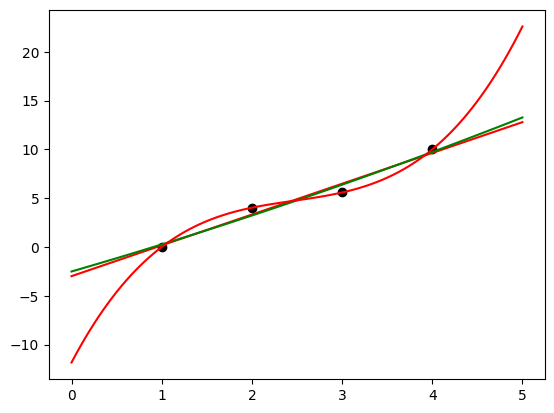

In [24]:
show_trend(trend_details)

In [26]:
round(trend_details['gradient'])

3

In [27]:
ticker_list

array(['AM', 'APA', 'BKR', 'LNG', 'CVX', 'COP', 'CTRA', 'DVN', 'FANG',
       'DTM', 'EVA', 'EOG', 'EQT', 'XOM', 'HAL', 'HES', 'DINO', 'KMI',
       'MRO', 'MPC', 'NFE', 'NOV', 'OXY', 'OKE', 'OVV', 'PDCE', 'PSX',
       'PXD', 'RRC', 'SLB', 'SWN', 'TRGP', 'TPL', 'VLO', 'WMB', 'AES',
       'LNT', 'AEE', 'AEP', 'AWK', 'ATO', 'AGR', 'CNP', 'CMS', 'ED',
       'CEG', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'WTRG', 'EVRG', 'ES',
       'EXC', 'FE', 'HE', 'IDA', 'MDU', 'NFG', 'NEE', 'NI', 'NRG', 'OGE',
       'PCG', 'PNW', 'PPL', 'PEG', 'SRE', 'SO', 'UGI', 'VST', 'WEC',
       'XEL', 'ATVI', 'GOOG', 'ATUS', 'AMC', 'T', 'CABO', 'CHTR', 'CMCSA',
       'DISH', 'DIS', 'EA', 'FOX', 'IAC', 'IPG', 'LBRDA', 'LYV', 'LUMN',
       'MSGS', 'MTCH', 'META', 'NFLX', 'NYT', 'NWS', 'NXST', 'OMC',
       'PARA', 'PINS', 'PLTK', 'RBLX', 'ROKU', 'SIRI', 'SPOT', 'TMUS',
       'TTWO', 'TRIP', 'VZ', 'WBD', 'WWE', 'ZI', 'ADM', 'ACI', 'MO', 'BJ',
       'SAM', 'BG', 'CPB', 'CHD', 'CLX', 'KO', 'CL', 'STZ', 'COST',
     

In [66]:
df = company['WMT']['income']
df

,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,netIncomeContinuousOperations,netInterestIncome,otherIncomeExpense,operatingExpense,totalExpenses,taxProvision,sellingGeneralAndAdministration,researchAndDevelopment,ebit
929,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2020-01-31,2020,01,523964000000,394605000000,129359000000,14881000000,20568000000,15201000000,-2410000000,1958000000,108791000000,503396000000,4915000000,108791000000,0,22715000000
930,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2021-01-31,2021,01,559151000000,420315000000,138836000000,13510000000,22548000000,13706000000,-2194000000,210000000,116288000000,536603000000,6858000000,116288000000,0,22879000000
931,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2022-01-31,2022,01,572754000000,429000000000,143754000000,13673000000,25942000000,13940000000,-1836000000,-5410000000,117812000000,546812000000,4756000000,117812000000,0,20690000000
932,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2023-01-31,2023,01,611289000000,463721000000,147568000000,11680000000,20428000000,11292000000,-1874000000,-1538000000,127140000000,590861000000,5724000000,127140000000,0,19144000000


In [69]:
df[['totalRevenue','costOfRevenue','grossProfit','netIncome','operatingIncome','ebit']].apply(lambda x: getTrendScore(x))

totalRevenue       3
costOfRevenue      3
grossProfit        3
netIncome         -3
operatingIncome    1
ebit              -3
dtype: int64

In [18]:
li = []

for ticker in company:
    
  print(ticker)
  df = company[ticker]['income'][['totalRevenue','costOfRevenue','grossProfit','netIncome','operatingIncome','ebit']]
  S = df.apply(lambda x: getTrendScore(x))
  S['company'] = ticker 
  li.append(S)

df_trend = pd.DataFrame(li)


AM
APA
BKR
LNG
CVX
COP
CTRA
DVN
FANG
DTM
EVA
EOG
EQT
XOM
HAL
HES
DINO
KMI
MRO
MPC
NFE
NOV
OXY
OKE
OVV
PDCE
PSX
PXD
RRC
SLB
SWN
TRGP
TPL
VLO
WMB
AES
LNT
AEE
AEP
AWK
ATO
AGR
CNP
CMS
ED
CEG
D
DTE
DUK
EIX
ETR
WTRG
EVRG
ES
EXC
FE
HE
IDA
MDU
NFG
NEE
NI
NRG
OGE
PCG
PNW
PPL
PEG
SRE
SO
UGI
VST
WEC
XEL
ATVI
GOOG
ATUS
AMC
T
CABO
CHTR
CMCSA
DISH
DIS
EA
FOX
IAC
IPG
LBRDA
LYV
LUMN
MSGS
MTCH
META
NFLX
NYT
NWS
NXST
OMC
PARA
PINS
PLTK
RBLX
ROKU
SIRI
SPOT
TMUS
TTWO
TRIP
VZ
WBD
WWE
ZI
ADM
ACI
MO
BJ
SAM
BG
CPB
CHD
CLX
KO
CL
STZ
COST
COTY
DAR
DG
DLTR
EL
FLO
FRPT
GO
HSY
HRL
INGR
K
KDP
KMB
KHC
KR
MKC
TAP
MDLZ
MNST
OLPX
PEP
PFGC
PM
PPC
POST
PG
REYN
SEB
SJM
SPB
SYY
TGT
TSN
USFD
WBA
WMT
APD
ALB
AA
AMCR
ATR
ASH
AVY
AXTA
BALL
BERY
CE
CF
CC
CLF
CTVA
CCK
DOW
DD
EXP
EMN
ECL
ESI
FMC
FCX
GPK
HUN
IFF
IP
LIN
LPX
LYB
MLM
MOS
MP
NEU
NEM
NUE
OLN
PKG
PPG
RS
SMG
SEE
SHW
SLGN
SON
SCCO
SSRM
STLD
X
VVV
VMC
WLK
WRK
Z
MMM
AYI
ADP
WMS
ACM
AGCO
AL
ALK
ALLE
ALSN
AAL
AME
AWI
CAR
AXON
AZEK
BA
BAH
BR
BLDR
BWXT
CHRW
CSL
CARR
CLVT
CLH
CP

In [19]:
df_trend

,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,ebit,company
0,-3,-3,-3,-1,-2,-1,AM
1,3,2,3,3,3,3,APA
2,-3,-3,0,1,1,1,BKR
3,-2,-2,-3,-3,-3,-3,LNG
4,-2,-2,-2,-2,-2,-2,CVX
5,3,3,3,2,3,2,COP
6,-2,-2,-2,-2,-2,-2,CTRA
7,3,3,3,3,3,3,DVN
8,-1,-2,-1,-1,-1,-1,FANG
9,0,0,0,0,0,0,DTM


In [20]:
ticker='WMT'
df = company[ticker]['income'][['totalRevenue','costOfRevenue','grossProfit','netIncome','operatingIncome','ebit']]
S = df.apply(lambda x: getTrendScore(x))

In [23]:
df.median()

totalRevenue      565952500000
costOfRevenue     424657500000
grossProfit       141295000000
netIncome          13591500000
operatingIncome    21558000000
ebit               21702500000
dtype: float64

In [24]:
df

,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,ebit
929,523964000000,394605000000,129359000000,14881000000,20568000000,22715000000
930,559151000000,420315000000,138836000000,13510000000,22548000000,22879000000
931,572754000000,429000000000,143754000000,13673000000,25942000000,20690000000
932,611289000000,463721000000,147568000000,11680000000,20428000000,19144000000


In [113]:
l_income_median = []
l_income_trend = []

for ticker in company:
    
  print(ticker)
  df = company[ticker]['income'][['totalRevenue','costOfRevenue','grossProfit','netIncome','operatingIncome','ebit']]
  company[ticker]['income_trend'] = df.apply(lambda x: getTrendScore(x))
  company[ticker]['income_median'] = df.median()
    
  S1 = company[ticker]['income_trend']
  S1['company'] = ticker
  S1['industry'] = company[ticker]['income']['industry'].unique()[0]

  S2 = company[ticker]['income_median']
  S2['company'] = ticker
  S2['industry'] = company[ticker]['income']['industry'].unique()[0]

  l_income_trend.append(S1)
  l_income_median.append(S2)

df_income_trend = pd.DataFrame(l_income_trend)
df_income_median = pd.DataFrame(l_income_median)

AM
APA
BKR
LNG
CVX
COP
CTRA
DVN
FANG
DTM
EVA
EOG
EQT
XOM
HAL
HES
DINO
KMI
MRO
MPC
NFE
NOV
OXY
OKE
OVV
PDCE
PSX
PXD
RRC
SLB
SWN
TRGP
TPL
VLO
WMB
AES
LNT
AEE
AEP
AWK
ATO
AGR
CNP
CMS
ED
CEG
D
DTE
DUK
EIX
ETR
WTRG
EVRG
ES
EXC
FE
HE
IDA
MDU
NFG
NEE
NI
NRG
OGE
PCG
PNW
PPL
PEG
SRE
SO
UGI
VST
WEC
XEL
ATVI
GOOG
ATUS
AMC
T
CABO
CHTR
CMCSA
DISH
DIS
EA
FOX
IAC
IPG
LBRDA
LYV
LUMN
MSGS
MTCH
META
NFLX
NYT
NWS
NXST
OMC
PARA
PINS
PLTK
RBLX
ROKU
SIRI
SPOT
TMUS
TTWO
TRIP
VZ
WBD
WWE
ZI
ADM
ACI
MO
BJ
SAM
BG
CPB
CHD
CLX
KO
CL
STZ
COST
COTY
DAR
DG
DLTR
EL
FLO
FRPT
GO
HSY
HRL
INGR
K
KDP
KMB
KHC
KR
MKC
TAP
MDLZ
MNST
OLPX
PEP
PFGC
PM
PPC
POST
PG
REYN
SEB
SJM
SPB
SYY
TGT
TSN
USFD
WBA
WMT
APD
ALB
AA
AMCR
ATR
ASH
AVY
AXTA
BALL
BERY
CE
CF
CC
CLF
CTVA
CCK
DOW
DD
EXP
EMN
ECL
ESI
FMC
FCX
GPK
HUN
IFF
IP
LIN
LPX
LYB
MLM
MOS
MP
NEU
NEM
NUE
OLN
PKG
PPG
RS
SMG
SEE
SHW
SLGN
SON
SCCO
SSRM
STLD
X
VVV
VMC
WLK
WRK
Z
MMM
AYI
ADP
WMS
ACM
AGCO
AL
ALK
ALLE
ALSN
AAL
AME
AWI
CAR
AXON
AZEK
BA
BAH
BR
BLDR
BWXT
CHRW
CSL
CARR
CLVT
CLH
CP

In [30]:
list(df_income_trend.columns)

['totalRevenue',
 'costOfRevenue',
 'grossProfit',
 'netIncome',
 'operatingIncome',
 'ebit',
 'company',
 'industry']

## Total Revenue

Check companies with revennue less than 100000000

In [31]:
mask=df_income_median['totalRevenue'] < 100000000
df_income_median[mask]

,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,ebit,company,industry
587,0,0,0,-231595000,-148143500,-230333000,QS,Auto Parts
590,27500000,260000000,-232500000,-2853000000,-2620500000,-2834500000,RIVN,Auto Manufacturers
681,12917000,0,12617000,-470271000,-471272000,-471272000,MRTX,Biotechnology


In [32]:
mask=df_income_median['costOfRevenue'] == 0
df_income_median[mask]

,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,ebit,company,industry
9,797000000,0,797000000,309500000,415500000,543500000,DTM,Oil & Gas Midstream
85,12606000000,0,12606000000,1400000000,2535500000,2246000000,FOX,Entertainment
88,512853000,0,512853000,564809500,-16138500,728161500,LBRDA,Telecom Services
96,9716000000,0,9716000000,242500000,589000000,544000000,NWS,Entertainment
513,13012000000,0,13012000000,2111500000,3706000000,3056500000,BKNG,Travel Services
587,0,0,0,-231595000,-148143500,-230333000,QS,Auto Parts
681,12917000,0,12617000,-470271000,-471272000,-471272000,MRTX,Biotechnology
685,810944000,0,777415500,-538099000,-530727500,-525243000,NVAX,Biotechnology
700,2179607500,0,2179607500,797364000,1512857500,1633171500,RPRX,Biotechnology


In [33]:
# Tamk a closer look at the income data for each of the above companies

mask = income_sheets['company'].isin(['QS','RIVN','MRTX'])
income_sheets[mask]

,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,netIncomeContinuousOperations,netInterestIncome,otherIncomeExpense,operatingExpense,totalExpenses,taxProvision,sellingGeneralAndAdministration,researchAndDevelopment,ebit
3638,QS,Consumer Cyclical,Consumer Discretionary,Auto Parts,2022-12-31,2022,12,0,0,0,-411907000,-420618000,-411896000,8506000,216000,420618000,420618000,0,123183000,297435000,-409497000
3640,QS,Consumer Cyclical,Consumer Discretionary,Auto Parts,2019-12-31,2019,12,0,0,0,-51283000,-55818000,-51263000,3514000,1041000,55818000,55818000,0,9874000,45944000,-51169000
3641,QS,Consumer Cyclical,Consumer Discretionary,Auto Parts,2020-12-31,2020,12,0,0,0,-1099914000,-81021000,-1099920000,-19672000,-999227000,81021000,81021000,0,15918000,65103000,-1079155000
3642,QS,Consumer Cyclical,Consumer Discretionary,Auto Parts,2021-12-31,2021,12,0,0,0,-45966000,-215266000,-45977000,464000,168825000,215266000,215266000,0,63770000,151496000,-44558000
3653,RIVN,Consumer Cyclical,Consumer Discretionary,Auto Manufacturers,2022-12-31,2022,12,1658000000,4781000000,-3123000000,-6752000000,-6856000000,-6752000000,90000000,18000000,3733000000,8514000000,4000000,1789000000,1944000000,-6645000000
3655,RIVN,Consumer Cyclical,Consumer Discretionary,Auto Manufacturers,2019-12-31,2019,12,0,0,0,-426000000,-409000000,-426000000,-16000000,-1000000,409000000,409000000,0,108000000,301000000,-392000000
3656,RIVN,Consumer Cyclical,Consumer Discretionary,Auto Manufacturers,2020-12-31,2020,12,0,0,0,-1018000000,-1021000000,-1018000000,2000000,1000000,1021000000,1021000000,0,255000000,766000000,-1010000000
3657,RIVN,Consumer Cyclical,Consumer Discretionary,Auto Manufacturers,2021-12-31,2021,12,55000000,520000000,-465000000,-4688000000,-4220000000,-4688000000,-26000000,-442000000,3755000000,4275000000,0,1242000000,1850000000,-4659000000
4182,MRTX,Healthcare,Health Care,Biotechnology,2021-12-31,2021,12,72092000,0,72092000,-582475000,-573181000,-581784000,0,-5304000,645273000,645273000,3299000,136679000,508594000,-573181000
4183,MRTX,Healthcare,Health Care,Biotechnology,2022-12-31,2022,12,12436000,600000,11836000,-740867000,-759589000,-740867000,0,19230000,771425000,772025000,508000,239798000,531627000,-759589000


Check companies with negative sales trends

In [34]:
mask=(df_income_trend['operatingIncome'] < -1) & (df_income_trend['netIncome'] > 0)
df_income_trend[mask].sort_values(by='totalRevenue')

,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,ebit,company,industry
180,-4,-4,-4,2,-2,2,DD,Specialty Chemicals
629,-3,-3,-2,2,-3,-2,AZTA,Medical Instruments & Supplies
540,-3,-4,-1,3,-2,3,F,Auto Manufacturers
161,-3,-2,-3,1,-2,0,WBA,Pharmaceutical Retailers
48,-2,-3,-2,1,-3,-1,DUK,Utilities—Regulated Electric
214,-2,-2,-2,3,-2,1,VMC,Building Materials
652,-2,-2,-2,3,-3,-2,ENOV,Specialty Industrial Machinery
507,-2,-2,-2,1,-2,0,APTV,Auto Parts
498,-2,-1,-2,1,-3,-3,WOLF,Semiconductors
242,-1,-2,-1,3,-3,3,CLVT,Information Technology Services


In [93]:
mask=df_income_trend['totalRevenue'] > 3
df_income_trend[mask].sort_values(by='totalRevenue')

,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,ebit,company,industry
62,4,4,2,-2,2,2,NRG,Utilities—Independent Power Producers
434,4,4,4,4,4,4,LRCX,Semiconductor Equipment & Materials
462,4,4,4,3,3,3,PTC,Software—Application
471,4,4,4,3,4,3,SWKS,Semiconductors
475,4,3,4,2,3,3,SSNC,Software—Application
480,4,4,4,4,4,4,TXN,Semiconductors
486,4,4,4,0,3,3,TYL,Software—Application
500,4,4,4,0,3,3,ZBRA,Communication Equipment
519,4,4,4,-1,3,2,CZR,Resorts & Casinos
538,4,4,4,3,3,3,FIVE,Specialty Retail


In [36]:

cols = ['industry',
        'totalRevenue',
        'costOfRevenue',
        'grossProfit',
        'netIncome',
        'operatingIncome',
        'ebit']

df_income_trend[cols].groupby('industry').mean().astype('int')

,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,ebit
industry,,,,,,
Advertising Agencies,1,0,2,1,2,1
Aerospace & Defense,0,0,0,0,0,0
Agricultural Inputs,0,1,0,0,0,0
Airlines,-1,-1,0,0,0,0
Aluminum,3,3,2,2,2,3
Apparel Manufacturing,0,0,0,0,0,0
Apparel Retail,0,0,0,1,1,1
Auto & Truck Dealerships,0,0,0,0,0,0
Auto Manufacturers,-1,-1,1,1,0,1


## Gross Profit

In [37]:
mask = df_median['grossProfit'] < 10000000
df_median[mask]

,company,industry,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,sellingGeneralAndAdministration,researchAndDevelopment,ebit
107,CCL,Travel Services,8881500000,10001000000,-1119500000,-7797000000,-5574000000,2182500000,0,-6196000000
508,PLUG,Electrical Equipment & Parts,366290500,498263000,-182833000,-510823500,-483094000,127877500,57890000,-491600500
530,QS,Auto Parts,0,0,0,-231595000,-148143500,39844000,108299500,-230333000
541,RIVN,Auto Manufacturers,27500000,260000000,-232500000,-2853000000,-2620500000,748500000,1308000000,-2834500000
588,SPR,Aerospace & Defense,4491300000,4525900000,-34600000,-543250000,-366000000,270300000,51850000,-303950000


In [73]:
pd.options.display.float_format = '{:.2f}'.format
cols = ['industry',
        'totalRevenue',
        'costOfRevenue',
        'grossProfit',
        'netIncome',
        'operatingIncome',
       'ebit']

df_income_trend[df_income_trend['grossProfit'] > 3].groupby('industry').count().sort_values(by='grossProfit')

,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,ebit,company
industry,,,,,,,
Beverages—Non-Alcoholic,1,1,1,1,1,1,1
Trucking,1,1,1,1,1,1,1
Telecom Services,1,1,1,1,1,1,1
Steel,1,1,1,1,1,1,1
Specialty Industrial Machinery,1,1,1,1,1,1,1
Resorts & Casinos,1,1,1,1,1,1,1
Medical Distribution,1,1,1,1,1,1,1
Utilities—Independent Power Producers,1,1,1,1,1,1,1
Household & Personal Products,1,1,1,1,1,1,1


In [25]:
ticker='WMT'
df = company[ticker]['income']
df

,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,netIncomeContinuousOperations,netInterestIncome,otherIncomeExpense,operatingExpense,totalExpenses,taxProvision,sellingGeneralAndAdministration,researchAndDevelopment,ebit
929,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2020-01-31,2020,01,523964000000,394605000000,129359000000,14881000000,20568000000,15201000000,-2410000000,1958000000,108791000000,503396000000,4915000000,108791000000,0,22715000000
930,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2021-01-31,2021,01,559151000000,420315000000,138836000000,13510000000,22548000000,13706000000,-2194000000,210000000,116288000000,536603000000,6858000000,116288000000,0,22879000000
931,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2022-01-31,2022,01,572754000000,429000000000,143754000000,13673000000,25942000000,13940000000,-1836000000,-5410000000,117812000000,546812000000,4756000000,117812000000,0,20690000000
932,WMT,Consumer Defensive,Consumer Staples,Discount Stores,2023-01-31,2023,01,611289000000,463721000000,147568000000,11680000000,20428000000,11292000000,-1874000000,-1538000000,127140000000,590861000000,5724000000,127140000000,0,19144000000


In [43]:
ticker='WMT'
df = company[ticker]['income'][['totalRevenue','costOfRevenue','grossProfit','netIncome','operatingIncome','ebit']]
company[ticker]['income_median'] = df.median()
S2 = company[ticker]['income_median']
S2['company'] = ticker
S2['industry'] = company[ticker]['income']['industry'].unique()

company[ticker]['income']['industry'].unique()[0]

'Discount Stores'

In [ ]:
### Score Income Sheet

0 - Poor
4 - Excellent

If Revenue is low or zero then disregard.

If gross profit is low or negative then the business is not viable as it currently stands.

If Operating Income is low or negative then general admin costs, marketing, R&D required for the business operation 
renders the business not profitable.

If net income is low or negative then having allowed for all costs including tax and interest, the business is 
not making any money.

If any of the above applies then we need to apply a ceiling, so that at best the rating applied is 2 (hold). 
Taking a mean of scores and applying a ceiling of 3 will result in a rating of 3 where several factors indicate 
a positive trend and also weigh up the relative strength of trends. if the positive trends are weak and offset by 
declining trends in other factors then the net effect is to push rating to 0 or 1 (indicating sell or strong sell).

Where business is making money:
    
Declining sales revenue is a concern.

Declining gross profit is a worrying indicator even if sales are increasing.

Declining operating income indicates that general costs including marketing and overheads are increasing even if 
trends for sales and profit are positive.

Declining net income indicates that effect of tax and interest is affecting the profitability of the business. 

Taking a mean score will work as strong declines in any factor prevent it from getting top score. More than one 
decline will take the score to a hold or below:
    
    4 4 4 -> 4
    2 4 4 -> 3
    1 4 4 -> 3
    2 3 4 -> 3
    2 2 4 -> 2
    

In [103]:
def scoreIncome(S_incomeTrend, S_Median):

  revenueThreshold = 100000000
  grossProfitThreshold = 1000000

  '''
  Score company on basis of income sheet
  '''

  s1 = {}

  # Total Revenue
    
  # If the revenue is below threshold then assign lowest score of 0. Otherwise, consider trend, distinguishing
  # positive and negative trends and degree of gradient. 

  feature = 'totalRevenue'

  if S_incomeMedian[feature] < revenueThreshold:
    s1[feature] = 0
  else:
    if S_incomeTrend[feature] < -2:
      s1[feature] = 1
    elif S_incomeTrend[feature] < 0:
      s1[feature] = 2
    elif S_incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4

  # Gross Profit

  # Only consider companies which are making a profit above threshold.Favour ones with positive trend.

  feature = 'grossProfit'

  if S_incomeMedian['grossProfit'] < grossProfitThreshold:
    s1[feature] = 0
  else:
    if S_incomeTrend[feature] < -2:
      s1[feature] = 1
    elif S_incomeTrend[feature] < 0:
      s1[feature] = 2
    elif S_incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
    
  # Operating Income

  # Gives us an indication of the effect of general costs including admin, marketing and R&D. Instead of looking
  # at SGA which may be rising in line with growth in business, the trend for operating income is a good indicator
  # of general direction.
    
  # If it is negative then the business is making a loss having taken into consideration of its operating costs.
  # As this brings into question whether the business is viable based on past performance.
    
  feature = 'operatingIncome'

  if S_incomeMedian[feature] < 0:
    s1[feature] = 0
  else:
    if S_incomeTrend[feature] < -2:
      s1[feature] = 1
    elif S_incomeTrend[feature] < 0:
      s1[feature] = 2
    elif S_incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
    
  # Net Income

  feature = 'netIncome'

  if S_incomeMedian[feature] < 0:
    s1[feature] = 0
  else:
    if S_incomeTrend[feature] < -2:
      s1[feature] = 1
    elif S_incomeTrend[feature] < 0:
      s1[feature] = 2
    elif S_incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4

  # Scoring

  # Determine mean score. If any of the scores are 0 then apply a ceiling of 2.
  
  l_scores = [s1['totalRevenue'],s1['grossProfit'],s1['operatingIncome'],s1['netIncome']]
    
  meanScore = int(np.mean(l_scores))

  if min(l_scores) == 0:
    if meanScore > 2:
      meanScore = 2

  score = {'score': meanScore,
           'scoreBreakdown': s1}

  return score


In [93]:
ticker = 'PG'
company[ticker]['incomeScore'] = scoreIncome(company[ticker]['income_trend'],company[ticker]['income_median'])
industry = company[ticker]['income']['industry'].unique()[0]
S3 = pd.Series({ 'company': ticker,
                  'industry': industry,
                  'incomeScore': company[ticker]['incomeScore']['score']})
S3

company                                   PG
industry       Household & Personal Products
incomeScore                                4
dtype: object

In [104]:
l_income_median = []
l_income_trend = []
l_score = []

for ticker in company:
    
  print(ticker)
  df = company[ticker]['income'][['totalRevenue','costOfRevenue','grossProfit','netIncome','operatingIncome','ebit']]
  company[ticker]['income_trend'] = df.apply(lambda x: getTrendScore(x))
  company[ticker]['income_median'] = df.median()
  company[ticker]['incomeScore'] = scoreIncome(company[ticker]['income_trend'],company[ticker]['income_median'])

  industry = company[ticker]['income']['industry'].unique()[0]
    
  S1 = company[ticker]['income_trend']
  S1['company'] = ticker
  S1['industry'] = industry

  S2 = company[ticker]['income_median']
  S2['company'] = ticker
  S2['industry'] = industry

  S3 = pd.Series({ 'company': ticker,
                   'industry': industry,
                   'incomeScore': company[ticker]['incomeScore']['score'],
                   'totalRevenue': company[ticker]['incomeScore']['scoreBreakdown']['totalRevenue'],
                   'grossProfit': company[ticker]['incomeScore']['scoreBreakdown']['grossProfit'],
                   'operatingIncome': company[ticker]['incomeScore']['scoreBreakdown']['operatingIncome'],
                   'netIncome': company[ticker]['incomeScore']['scoreBreakdown']['netIncome']})
                  
  l_income_trend.append(S1)
  l_income_median.append(S2)
  l_score.append(S3)

df_income_trend = pd.DataFrame(l_income_trend)
df_income_median = pd.DataFrame(l_income_median)
df_score = pd.DataFrame(l_score)

AM
APA
BKR
LNG
CVX
COP
CTRA
DVN
FANG
DTM
EVA
EOG
EQT
XOM
HAL
HES
DINO
KMI
MRO
MPC
NFE
NOV
OXY
OKE
OVV
PDCE
PSX
PXD
RRC
SLB
SWN
TRGP
TPL
VLO
WMB
AES
LNT
AEE
AEP
AWK
ATO
AGR
CNP
CMS
ED
CEG
D
DTE
DUK
EIX
ETR
WTRG
EVRG
ES
EXC
FE
HE
IDA
MDU
NFG
NEE
NI
NRG
OGE
PCG
PNW
PPL
PEG
SRE
SO
UGI
VST
WEC
XEL
ATVI
GOOG
ATUS
AMC
T
CABO
CHTR
CMCSA
DISH
DIS
EA
FOX
IAC
IPG
LBRDA
LYV
LUMN
MSGS
MTCH
META
NFLX
NYT
NWS
NXST
OMC
PARA
PINS
PLTK
RBLX
ROKU
SIRI
SPOT
TMUS
TTWO
TRIP
VZ
WBD
WWE
ZI
ADM
ACI
MO
BJ
SAM
BG
CPB
CHD
CLX
KO
CL
STZ
COST
COTY
DAR
DG
DLTR
EL
FLO
FRPT
GO
HSY
HRL
INGR
K
KDP
KMB
KHC
KR
MKC
TAP
MDLZ
MNST
OLPX
PEP
PFGC
PM
PPC
POST
PG
REYN
SEB
SJM
SPB
SYY
TGT
TSN
USFD
WBA
WMT
APD
ALB
AA
AMCR
ATR
ASH
AVY
AXTA
BALL
BERY
CE
CF
CC
CLF
CTVA
CCK
DOW
DD
EXP
EMN
ECL
ESI
FMC
FCX
GPK
HUN
IFF
IP
LIN
LPX
LYB
MLM
MOS
MP
NEU
NEM
NUE
OLN
PKG
PPG
RS
SMG
SEE
SHW
SLGN
SON
SCCO
SSRM
STLD
X
VVV
VMC
WLK
WRK
Z
MMM
AYI
ADP
WMS
ACM
AGCO
AL
ALK
ALLE
ALSN
AAL
AME
AWI
CAR
AXON
AZEK
BA
BAH
BR
BLDR
BWXT
CHRW
CSL
CARR
CLVT
CLH
CP

In [105]:
df_score.sort_values(by='incomeScore',ascending=False)

,company,industry,incomeScore,totalRevenue,grossProfit,operatingIncome,netIncome
361,ACN,Information Technology Services,4,4,4,4,4
259,FAST,Industrial Distribution,4,4,4,4,4
324,SAIC,Information Technology Services,4,4,4,4,4
323,R,Rental & Leasing Services,4,4,4,4,4
318,RBA,Specialty Business Services,4,4,4,4,4
314,PWR,Engineering & Construction,4,4,4,4,4
307,ODFL,Trucking,4,4,4,4,4
306,NVT,Electrical Equipment & Parts,4,4,4,4,4
304,NSC,Railroads,4,4,4,4,4
303,NDSN,Specialty Industrial Machinery,4,4,4,4,4


In [102]:
company[ticker]['incomeScore']

{'score': 1,
 'ScoreBreakdown': {'totalRevenue': 1,
  'grossProfit': 1,
  'operatingIncome': 2,
  'netIncome': 0}}

In [100]:
df_score.groupby('incomeScore').count()

,company,industry
incomeScore,,
0,11,11
1,98,98
2,234,234
3,199,199
4,181,181


## Balance Sheet Analysis

In [114]:
balance_sheets

,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,cashEquivalents,receivables,finishedGoods,workInProcess,rawMaterials,otherCurrentAssets,inventory,currentAssets,netPPE,otherNonCurrentAssets,financialAssets,goodwill,nonCurrentAccountsReceivable,totalNonCurrentAssets,currentDebt,payablesAndAccruedExpenses,totalTaxPayable,otherCurrentLiabilities,currentLiabilities,longTermDebt,longTermDebtAndCapitalLeaseObligation,totalNonCurrentLiabilities,retainedEarnings,stockholdersEquity,totalDebt,totalAssets,totalLiabilities,workingCapital,quickRatio,currentRatio,debtEquityRatio,debtCapitalRatio,debtAssetRatio,FinancialLeverageRatio
0,AM,Energy,Energy,Oil & Gas Midstream,2019-12-31,2019,12,1235000.00,105603000.00,0.00,0.00,0.00,1720000.00,0.00,108558000.00,3273410000.00,14460000.00,0.00,2073580000.00,0.00,6174320000.00,0.00,113979000.00,0.00,128105000.00,242084000.00,2892249000.00,2892249000.00,2897380000.00,-341565000.00,3143414000.00,2892249000.00,6282878000.00,3139464000.00,-133526000.00,0.45,0.45,0.92,47.92,46.03,199.87
1,AM,Energy,Energy,Oil & Gas Midstream,2020-12-31,2020,12,640000.00,91812000.00,0.00,0.00,0.00,1479000.00,0.00,93931000.00,3254044000.00,9610000.00,0.00,1427447000.00,0.00,5516981000.00,0.00,88304000.00,3368000.00,5701000.00,94005000.00,3091626000.00,3091626000.00,3098621000.00,-464092000.00,2418286000.00,3091626000.00,5610912000.00,3192626000.00,-74000.00,1.00,1.00,1.28,56.11,55.10,232.02
2,AM,Energy,Energy,Oil & Gas Midstream,2021-12-31,2021,12,0.00,82884000.00,0.00,0.00,0.00,920000.00,0.00,83804000.00,3394746000.00,12667000.00,0.00,1356775000.00,0.00,5460197000.00,0.00,109386000.00,5400000.00,4623000.00,114009000.00,3122910000.00,3122910000.00,3143294000.00,-132475000.00,2286698000.00,3122910000.00,5544001000.00,3257303000.00,-30205000.00,0.74,0.74,1.37,57.73,56.33,242.45
3,AM,Energy,Energy,Oil & Gas Midstream,2022-12-31,2022,12,0.00,87667000.00,0.00,0.00,0.00,1326000.00,0.00,88993000.00,3751431000.00,12026000.00,0.00,1286103000.00,0.00,5702327000.00,0.00,101016000.00,5661000.00,1061000.00,102077000.00,3361282000.00,3361282000.00,3496925000.00,82793000.00,2192318000.00,3361282000.00,5791320000.00,3599002000.00,-13084000.00,0.87,0.87,1.53,60.52,58.04,264.16
8,APA,Energy,Energy,Oil & Gas E&P,2019-12-31,2019,12,247000000.00,1062000000.00,0.00,0.00,0.00,1714000000.00,502000000.00,1961000000.00,14158000000.00,1988000000.00,0.00,0.00,0.00,16146000000.00,11000000.00,1360000000.00,51000000.00,1844000000.00,1855000000.00,8555000000.00,8555000000.00,11787000000.00,-5601000000.00,3255000000.00,8566000000.00,18107000000.00,13642000000.00,106000000.00,0.79,1.06,2.63,72.46,47.31,556.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,ZBH,Healthcare,Health Care,Medical Devices,2022-12-31,2022,12,375700000.00,1381500000.00,1655000000.00,230900000.00,261300000.00,522900000.00,2147200000.00,4427300000.00,1872500000.00,1122200000.00,0.00,13644000000.00,0.00,16638700000.00,544300000.00,974900000.00,38500000.00,1813900000.00,2358200000.00,5152200000.00,5152200000.00,6680800000.00,9559300000.00,12021300000.00,5696500000.00,21066000000.00,9039000000.00,2069100000.00,0.97,1.88,0.47,32.15,27.04,175.24
3360,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2019-12-31,2019,12,1932000000.00,1086000000.00,701000000.00,511000000.00,198000000.00,318000000.00,1410000000.00,4748000000.00,2129000000.00,98000000.00,0.00,4482000000.00,0.00,6797000000.00,500000000.00,975000000.00,36000000.00,55000000.00,1806000000.00,5947000000.00,6111000000.00,7031000000.00,4427000000.00,2708000000.00,6447000000.00,11545000000.00,8837000000.00,2942000000.00,1.85,2.63,2.38,70.42,55.84,426.33
3361,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2020-12-31,2020,12,3602000000.00,1013000000.00,805000000.00,594000000.00,229000000.00,366000000.00,1628000000.00,6611000000.00,2394000000.00,106000000.00,0.00,

In [27]:
list(balance_sheets.columns)

['company',
 'yahoo_sector',
 'gics_sector',
 'industry',
 'st_date',
 'st_YR',
 'st_Mnth',
 'cashEquivalents',
 'receivables',
 'finishedGoods',
 'workInProcess',
 'rawMaterials',
 'otherCurrentAssets',
 'inventory',
 'currentAssets',
 'netPPE',
 'otherNonCurrentAssets',
 'financialAssets',
 'goodwill',
 'nonCurrentAccountsReceivable',
 'totalNonCurrentAssets',
 'currentDebt',
 'payablesAndAccruedExpenses',
 'totalTaxPayable',
 'otherCurrentLiabilities',
 'currentLiabilities',
 'longTermDebt',
 'longTermDebtAndCapitalLeaseObligation',
 'totalNonCurrentLiabilities',
 'retainedEarnings',
 'stockholdersEquity',
 'totalDebt',
 'totalAssets',
 'totalLiabilities',
 'workingCapital',
 'quickRatio',
 'currentRatio',
 'debtEquityRatio',
 'debtCapitalRatio',
 'debtAssetRatio',
 'FinancialLeverageRatio']

In [28]:
balance_sheets

,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,cashEquivalents,receivables,finishedGoods,workInProcess,rawMaterials,otherCurrentAssets,inventory,currentAssets,netPPE,otherNonCurrentAssets,financialAssets,goodwill,nonCurrentAccountsReceivable,totalNonCurrentAssets,currentDebt,payablesAndAccruedExpenses,totalTaxPayable,otherCurrentLiabilities,currentLiabilities,longTermDebt,longTermDebtAndCapitalLeaseObligation,totalNonCurrentLiabilities,retainedEarnings,stockholdersEquity,totalDebt,totalAssets,totalLiabilities,workingCapital,quickRatio,currentRatio,debtEquityRatio,debtCapitalRatio,debtAssetRatio,FinancialLeverageRatio
0,AM,Energy,Energy,Oil & Gas Midstream,2019-12-31,2019,12,1235000,105603000,0,0,0,1720000,0,108558000,3273410000,14460000,0,2073580000,0,6174320000,0,113979000,0,128105000,242084000,2892249000,2892249000,2897380000,-341565000,3143414000,2892249000,6282878000,3139464000,-133526000,0,0,1,0,0,2
1,AM,Energy,Energy,Oil & Gas Midstream,2020-12-31,2020,12,640000,91812000,0,0,0,1479000,0,93931000,3254044000,9610000,0,1427447000,0,5516981000,0,88304000,3368000,5701000,94005000,3091626000,3091626000,3098621000,-464092000,2418286000,3091626000,5610912000,3192626000,-74000,1,1,1,1,1,2
2,AM,Energy,Energy,Oil & Gas Midstream,2021-12-31,2021,12,0,82884000,0,0,0,920000,0,83804000,3394746000,12667000,0,1356775000,0,5460197000,0,109386000,5400000,4623000,114009000,3122910000,3122910000,3143294000,-132475000,2286698000,3122910000,5544001000,3257303000,-30205000,1,1,1,1,1,2
3,AM,Energy,Energy,Oil & Gas Midstream,2022-12-31,2022,12,0,87667000,0,0,0,1326000,0,88993000,3751431000,12026000,0,1286103000,0,5702327000,0,101016000,5661000,1061000,102077000,3361282000,3361282000,3496925000,82793000,2192318000,3361282000,5791320000,3599002000,-13084000,1,1,2,1,1,3
8,APA,Energy,Energy,Oil & Gas E&P,2019-12-31,2019,12,247000000,1062000000,0,0,0,1714000000,502000000,1961000000,14158000000,1988000000,0,0,0,16146000000,11000000,1360000000,51000000,1844000000,1855000000,8555000000,8555000000,11787000000,-5601000000,3255000000,8566000000,18107000000,13642000000,106000000,1,1,3,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,ZBH,Healthcare,Health Care,Medical Devices,2022-12-31,2022,12,375700000,1381500000,1655000000,230900000,261300000,522900000,2147200000,4427300000,1872500000,1122200000,0,13644000000,0,16638700000,544300000,974900000,38500000,1813900000,2358200000,5152200000,5152200000,6680800000,9559300000,12021300000,5696500000,21066000000,9039000000,2069100000,1,2,0,0,0,2
3360,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2019-12-31,2019,12,1932000000,1086000000,701000000,511000000,198000000,318000000,1410000000,4748000000,2129000000,98000000,0,4482000000,0,6797000000,500000000,975000000,36000000,55000000,1806000000,5947000000,6111000000,7031000000,4427000000,2708000000,6447000000,11545000000,8837000000,2942000000,2,3,2,1,1,4
3361,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2020-12-31,2020,12,3602000000,1013000000,805000000,594000000,229000000,366000000,1628000000,6611000000,2394000000,106000000,0,4404000000,0,6998000000,604000000,1178000000,46000000,93000000,2170000000,6595000000,6758000000,7666000000,5659000000,3769000000,7199000000,13609000000,9836000000,4441000000,2,3,2,1,1,4
3362,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2021-12-31,2021,12,3482000000,1133000000,888000000,696000000,339000000,389000000,1923000000,6930000000,2603000000,111000000,0,4156000000,0,6970000000,0,1338000000,38000000,67000000,1797000000,6592000000,6743000000,7559000000,7186000000,4543000000,6592000000,13900000000,9356000000,5133000000,3,4,1,1,0,3


In [29]:
list(balance_sheets.columns)

['company',
 'yahoo_sector',
 'gics_sector',
 'industry',
 'st_date',
 'st_YR',
 'st_Mnth',
 'cashEquivalents',
 'receivables',
 'finishedGoods',
 'workInProcess',
 'rawMaterials',
 'otherCurrentAssets',
 'inventory',
 'currentAssets',
 'netPPE',
 'otherNonCurrentAssets',
 'financialAssets',
 'goodwill',
 'nonCurrentAccountsReceivable',
 'totalNonCurrentAssets',
 'currentDebt',
 'payablesAndAccruedExpenses',
 'totalTaxPayable',
 'otherCurrentLiabilities',
 'currentLiabilities',
 'longTermDebt',
 'longTermDebtAndCapitalLeaseObligation',
 'totalNonCurrentLiabilities',
 'retainedEarnings',
 'stockholdersEquity',
 'totalDebt',
 'totalAssets',
 'totalLiabilities',
 'workingCapital',
 'quickRatio',
 'currentRatio',
 'debtEquityRatio',
 'debtCapitalRatio',
 'debtAssetRatio',
 'FinancialLeverageRatio']

In [115]:
cols = ['company',
        'industry',
        'st_YR',
        'cashEquivalents',
        'receivables',
        'inventory',
        'currentAssets',
        'netPPE',
        'goodwill',
        'totalNonCurrentAssets',
        'currentDebt',
        'payablesAndAccruedExpenses',
        'totalTaxPayable',
        'otherCurrentLiabilities',
        'currentLiabilities',
        'longTermDebt',
        'totalNonCurrentLiabilities',
        'retainedEarnings',
        'stockholdersEquity']
df = balance_sheets[cols].copy()

In [32]:
pd.options.display.float_format = '{:.2f}'.format
df

,company,industry,st_YR,cashEquivalents,receivables,inventory,currentAssets,netPPE,goodwill,totalNonCurrentAssets,currentDebt,payablesAndAccruedExpenses,totalTaxPayable,otherCurrentLiabilities,currentLiabilities,longTermDebt,totalNonCurrentLiabilities,retainedEarnings,stockholdersEquity,totalDebt,totalAssets,totalLiabilities,workingCapital,quickRatio,currentRatio,debtEquityRatio,debtCapitalRatio,debtAssetRatio
0,AM,Oil & Gas Midstream,2019,1235000.00,105603000.00,0.00,108558000.00,3273410000.00,2073580000.00,6174320000.00,0.00,113979000.00,0.00,128105000.00,242084000.00,2892249000.00,2897380000.00,-341565000.00,3143414000.00,2892249000.00,6282878000.00,3139464000.00,-133526000.00,0.45,0.45,1.00,0.48,0.46
1,AM,Oil & Gas Midstream,2020,640000.00,91812000.00,0.00,93931000.00,3254044000.00,1427447000.00,5516981000.00,0.00,88304000.00,3368000.00,5701000.00,94005000.00,3091626000.00,3098621000.00,-464092000.00,2418286000.00,3091626000.00,5610912000.00,3192626000.00,-74000.00,1.00,1.00,1.00,0.56,0.55
2,AM,Oil & Gas Midstream,2021,0.00,82884000.00,0.00,83804000.00,3394746000.00,1356775000.00,5460197000.00,0.00,109386000.00,5400000.00,4623000.00,114009000.00,3122910000.00,3143294000.00,-132475000.00,2286698000.00,3122910000.00,5544001000.00,3257303000.00,-30205000.00,0.74,0.74,1.00,0.58,0.56
3,AM,Oil & Gas Midstream,2022,0.00,87667000.00,0.00,88993000.00,3751431000.00,1286103000.00,5702327000.00,0.00,101016000.00,5661000.00,1061000.00,102077000.00,3361282000.00,3496925000.00,82793000.00,2192318000.00,3361282000.00,5791320000.00,3599002000.00,-13084000.00,0.87,0.87,1.00,0.61,0.58
8,APA,Oil & Gas E&P,2019,247000000.00,1062000000.00,502000000.00,1961000000.00,14158000000.00,0.00,16146000000.00,11000000.00,1360000000.00,51000000.00,1844000000.00,1855000000.00,8555000000.00,11787000000.00,-5601000000.00,3255000000.00,8566000000.00,18107000000.00,13642000000.00,106000000.00,0.79,1.06,1.00,0.72,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,ZBH,Medical Devices,2022,375700000.00,1381500000.00,2147200000.00,4427300000.00,1872500000.00,13644000000.00,16638700000.00,544300000.00,974900000.00,38500000.00,1813900000.00,2358200000.00,5152200000.00,6680800000.00,9559300000.00,12021300000.00,5696500000.00,21066000000.00,9039000000.00,2069100000.00,0.97,1.88,0.90,0.30,0.27
3360,ZTS,Drug Manufacturers—Specialty & Generic,2019,1932000000.00,1086000000.00,1410000000.00,4748000000.00,2129000000.00,4482000000.00,6797000000.00,500000000.00,975000000.00,36000000.00,55000000.00,1806000000.00,5947000000.00,7031000000.00,4427000000.00,2708000000.00,6447000000.00,11545000000.00,8837000000.00,2942000000.00,1.85,2.63,0.92,0.69,0.56
3361,ZTS,Drug Manufacturers—Specialty & Generic,2020,3602000000.00,1013000000.00,1628000000.00,6611000000.00,2394000000.00,4404000000.00,6998000000.00,604000000.00,1178000000.00,46000000.00,93000000.00,2170000000.00,6595000000.00,7666000000.00,5659000000.00,3769000000.00,7199000000.00,13609000000.00,9836000000.00,4441000000.00,2.30,3.05,0.92,0.64,0.53
3362,ZTS,Drug Manufacturers—Specialty & Generic,2021,3482000000.00,1133000000.00,1923000000.00,6930000000.00,2603000000.00,4156000000.00,6970000000.00,0.00,1338000000.00,38000000.00,67000000.00,1797000000.00,6592000000.00,7559000000.00,7186000000.00,4543000000.00,6592000000.00,13900000000.00,9356000000.00,5133000000.00,2.79,3.86,1.00,0.59,0.47


In [116]:
def scoreBalance(S_Trend, S_Median):

  equityThreshold = 100000000
  cashThreshold = 10000000
  debtCapitalThreshold = 90
  debtAssetThreshold = 90

  s1 = {}

  # Stockholders Equity
    
  # If stockholders equity is below threshold then treat net asset value as negligible 
  # and score as 0. Otherwise consider trend to determine score.

  feature = 'stockholdersEquity'

  if S_Median[feature] < equityThreshold:
    s1[feature] = 0
  else:
    if S_Trend[feature] < -2:
      s1[feature] = 1
    elif S_Trend[feature] < 0:
      s1[feature] = 2
    elif S_Trend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
    
  # Retained Profits

  # Positive and high retained profits is a sign of strength but a number of factors can influence whether this
  # is a good thing. Negative retained profits is bad as it signals losses in previous years and perhaps dividend
  # payouts not funded from earnings. 
    
  # Consider positive retained profit as ok and apply max score. For negative, set score to 0 and upgrade score 
  # if there is a positive trend.
    
  feature = 'retainedEarnings'

  if S_Median[feature] < 0:
    
    # Set score to 0 and upgrade if trend is positive
    
    s1[feature] = 0
  
    if S_Trend[feature] > 2:
      s1[feature] = 2
    elif S_Trend[feature] > 0:
      s1[feature] = 1
  else:
    # If retained profits is positive, set score to max
    
    s1[feature] = 4

  # Cash Assets

  # One would expect all companies to hold a minimum of cash to cover short term liabilities so any below
  # specified threshold should be scored 0. Any above threshold should be scored according to trend. 

  # A positive trend (>0) is reassuring while a declining trend may raise concerns even if historical cash 
  # positions have been good).

  feature = 'cashEquivalents'

  if S_Median[feature] < cashThreshold:
    s1[feature] = 0
  else:
    if S_Trend[feature] < -2:
      s1[feature] = 1
    elif S_Trend[feature] < 0:
      s1[feature] = 2
    elif S_Trend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
    
  # Working Capital

  # Various factors such as accounts receivables and inventory can affect this figure from one period to another. 
  # Also a positive trend is not necessarily a good thing as it may indicate in increase in inventory and goods 
  # not sold as quickly. 
    
  # So let's concern ourselves only where negative working capital. Where this is the case, a negative trend 
  # indicates a worsening gap between current assets and liabilities while a positive trend indicates an 
  # improvement.

  # A negative working capital depends on industry and with a strong positive trend, should not by itself be a 
  # reason for not buying the stock. If other indicators are week then this will drive the overall score down 
  # anyway.
    
  feature = 'workingCapital'
    
  if S_Median[feature] < 0:
    if S_Trend[feature] < -2:
      s1[feature] = 0
    elif S_Trend[feature] < 0:
      s1[feature] = 1
    elif S_Trend[feature] < 2:
      s1[feature] = 2
    else:
      s1[feature] = 3
  else:
    # Set score to max if working capital is positive
    s1[feature] = 4
    
  # Quick Ratio

  # Determines how strong the company is in paying off short term liabilities using cash assets. < 1 is bad,
  # > 3 is good.

  feature = 'quickRatio'
    
  if S_Median[feature] < 0.5:
    s1[feature] = 0
  elif S_Median[feature] < 1.0:
    s1[feature] = 1
  elif S_Median[feature] < 2.0:
    s1[feature] = 2
  elif S_Median[feature] < 3.0:
    s1[feature] = 3
  else:
    s1[feature] = 4
    
  # The median value for ratio may be high for some reason but there may be a steep downward trend indicating
  # a deterioration.
  # Alternatively median quick ratio may be low for some reason but there may be a steep upward trend indiating
  # a rapid improvement.
    
  # Apply adjustment to score considering gradient and direction, while setting a floor of 0 and max of 4.

  if S_Trend[feature] < -2:
    # Steep decline
    s1[feature] = max(s1[feature] - 2,0)
  elif S_Trend[feature] < 0:
    # Gentle decline
    s1[feature] = max(s1[feature] - 1,0)
  elif S_Trend[feature] < 2:
    # Gentle incline
    s1[feature] = min(s1[feature] + 1,4)
  else:
    # Steep incline
    s1[feature] = 4
        
  # Current Ratio

  feature = 'currentRatio'
    
  if S_Median[feature] < 0.5:
    s1[feature] = 0
  elif S_Median[feature] < 1.0:
    s1[feature] = 1
  elif S_Median[feature] < 2.0:
    s1[feature] = 2
  elif S_Median[feature] < 3.0:
    s1[feature] = 3
  else:
    s1[feature] = 4
    
  # The median value for ratio may be high for some reason but there may be a steep downward trend indicating
  # a deterioration.
  # Alternatively median quick ratio may be low for some reason but there may be a steep upward trend indiating
  # a rapid improvement.
    
  # Applying adjustment to score considering gradient and direction, while setting a floor of 0 and max of 4.

  if S_Trend[feature] < -2:
    # Steep decline
    s1[feature] = max(s1[feature] - 2,0)
  elif S_Trend[feature] < 0:
    # Gentle decline
    s1[feature] = max(s1[feature] - 1,0)
  elif S_Trend[feature] < 2:
    # Gentle incline
    s1[feature] = min(s1[feature] + 1,4)
  else:
    # Steep incline
    s1[feature] = 4
        
  # Solvency Rato - Debt to Capital Ratio

  # Indication of level of leverage. Consider industry norm plus max threshold of 75%.
    
  # If stockholder equity is below threshold then set a default score of 0 as it is meaningless to calculate 
  # a ratio where equity is negligible or even negative.
    
  # Set score to 0 if leverage is > 80%
    
  feature = 'debtCapitalRatio'

  if S_Median['stockholdersEquity'] < equityThreshold:
    s1[feature] = 0
  elif S_Median[feature] > debtCapitalThreshold:
    s1[feature] = 0 
  elif S_Median[feature] > 60:
    s1[feature] = 1
  elif S_Median[feature] > 50:
     s1[feature] = 2
  elif S_Median[feature] > 30:
     s1[feature] = 3
  else:
     s1[feature] = 4
    
  # Check Industry Averages and adjust score upwards if it is better and lower if it is worse
  # Apply a tolerance of 5 and do nothing where ration is in the vicinity of median

 # if S_Median[feature] < (industryRatio[feature]['median'] - 5):
#    s1[feature] = min(s1[feature] + 1,4)
 # elif S_Median[feature] > (industryRatio[feature]['median'] + 5):
 #   s1[feature] = max(s1[feature] - 1,0)
 
  # Now consider trend
    
  # If the score is not 0 then adjust according the gradient and direction of trend.

  # Reasoning: if the score is high (3 or 4) but trend is upwards (increasing leverage) then downgrade depending
  # on whether the gradient is steep. If the score is low (1 or 2) but the trend is downwards (decreasing leverage)
  # then upgrade depending on whether gradient is steep.
    
  # The balance we are looking to achieve here is the trade off between risk associated with high leverage and 
  # trend which signals improvement or decline.

  if s1[feature] > 0:

    if S_Trend[feature] < -2:
      # Steep decline
      s1[feature] = min(s1[feature] + 1,4)
    elif S_Trend[feature] < 0:
      # Gentle decline
      s1[feature] = min(s1[feature] + 1,4)
    elif S_Trend[feature] < 2:
      # Gentle incline
      s1[feature] = min(s1[feature] - 1,0)
    else:
      # Steep incline
      s1[feature] = min(s1[feature] - 1,0)
    
  # Solvency - Debt to Asset Ratio

  # Given that shareholder equity is negative or small in many cases, it makes sense to consider debt to asset
  # ratio as well to assess levels of debt relative to assets. 

  # Also we want to create a bias against companies with high levels of debt so considering both scores will help
  # this. 

  # If ratio is above threshold then set score to 0.

  feature = 'debtCapitalRatio'

  if S_Median[feature] > debtAssetThreshold:
    s1[feature] = 0 
  elif S_Median[feature] > 60:
    s1[feature] = 1
  elif S_Median[feature] > 50:
     s1[feature] = 2
  elif S_Median[feature] > 30:
     s1[feature] = 3
  else:
     s1[feature] = 4
    
  # Check Industry Averages and adjust score upwards if it is better and lower if it is worse
  # Apply a tolerance of 5 and do nothing where ration is in the vicinity of median

#  if S_Median[feature] < (industryRatio[feature]['median'] - 5):
#    s1[feature] = min(s1[feature] + 1,4)
#  elif S_Median[feature] > (industryRatio[feature]['median'] + 5):
#    s1[feature] = max(s1[feature] - 1,0)
    
  # Now consider trend
    
  # If the score is not 0 then adjust according the gradient and direction of trend.

  # Reasoning: if the score is high (3 or 4) but trend is upwards (increasing leverage) then downgrade depending
  # on whether the gradient is steep. If the score is low (1 or 2) but the trend is downwards (decreasing leverage)
  # then upgrade depending on whether gradient is steep.
    
  # The balance we are looking to achieve here is the trade off between risk associated with high leverage and 
  # trend which signals improvement or decline.

  if s1[feature] > 0:

    if S_Trend[feature] < -2:
      # Steep decline
      s1[feature] = min(s1[feature] + 1,4)
    elif S_Trend[feature] < 0:
      # Gentle decline
      s1[feature] = min(s1[feature] + 1,4)
    elif S_Trend[feature] < 2:
      # Gentle incline
      s1[feature] = min(s1[feature] - 1,0)
    else:
      # Steep incline
      s1[feature] = min(s1[feature] - 1,0)
        
  # Scoring

  # Determine mean score. If any of the scores are 0 then apply a ceiling of 2.
  
  l_scores = list(s1.values())
    
  meanScore = int(np.mean(l_scores))

  if min(l_scores) == 0:
    if meanScore > 2:
      meanScore = 2

  score = {'score': meanScore,
           'scoreBreakdown': s1}

  return score


In [31]:
list(df.columns)

['company',
 'industry',
 'st_YR',
 'cashEquivalents',
 'receivables',
 'inventory',
 'currentAssets',
 'netPPE',
 'goodwill',
 'totalNonCurrentAssets',
 'currentDebt',
 'payablesAndAccruedExpenses',
 'totalTaxPayable',
 'otherCurrentLiabilities',
 'currentLiabilities',
 'longTermDebt',
 'totalNonCurrentLiabilities',
 'retainedEarnings',
 'stockholdersEquity',
 'totalDebt',
 'totalAssets',
 'totalLiabilities',
 'workingCapital',
 'debtEquityRatio',
 'debtCapitalRatio',
 'debtAssetRatio',
 'FinancialLeverageRatio',
 'quickRatio',
 'currentRatio']

In [117]:
l_median = []
l_trend = []
l_score = []

cols = ['cashEquivalents',
        'receivables',
        'inventory',
        'currentAssets',
        'netPPE',
        'goodwill',
        'totalNonCurrentAssets',
        'currentDebt',
        'payablesAndAccruedExpenses',
        'totalTaxPayable',
        'otherCurrentLiabilities',
        'currentLiabilities',
        'longTermDebt',
        'totalNonCurrentLiabilities',
        'retainedEarnings',
        'stockholdersEquity',
        'totalDebt',
        'totalAssets',
        'totalLiabilities',
        'workingCapital',
        'debtCapitalRatio',
        'debtAssetRatio',
        'quickRatio',
        'currentRatio']

for ticker in company:
    
  print(ticker)
  df = company[ticker]['balance'][cols]
  company[ticker]['balance_trend'] = df.apply(lambda x: getTrendScore(x))
  company[ticker]['balance_median'] = df.median()
  company[ticker]['balanceScore'] = scoreBalance(company[ticker]['balance_trend'],company[ticker]['balance_median'])

  industry = company[ticker]['balance']['industry'].unique()[0]
    
  S1 = company[ticker]['balance_trend']
  S1['company'] = ticker
  S1['industry'] = industry

  S2 = company[ticker]['balance_median']
  S2['company'] = ticker
  S2['industry'] = industry

  S3 = pd.Series({ 'company': ticker,
                   'industry': industry,
                   'balanceScore': company[ticker]['balanceScore']['score'],
                   'stockholdersEquity': company[ticker]['balanceScore']['scoreBreakdown']['stockholdersEquity'],
                   'retainedEarnings': company[ticker]['balanceScore']['scoreBreakdown']['retainedEarnings'],
                   'cashEquivalents': company[ticker]['balanceScore']['scoreBreakdown']['cashEquivalents'],           
                   'workingCapital': company[ticker]['balanceScore']['scoreBreakdown']['workingCapital'],          
                   'quickRatio': company[ticker]['balanceScore']['scoreBreakdown']['quickRatio'],
                   'currentRatio': company[ticker]['balanceScore']['scoreBreakdown']['currentRatio'],
                   'debtCapitalRatio': company[ticker]['balanceScore']['scoreBreakdown']['debtCapitalRatio']})
                  
  l_trend.append(S1)
  l_median.append(S2)
  l_score.append(S3)

df_balance_trend = pd.DataFrame(l_trend)
df_balance_median = pd.DataFrame(l_median)
df_balance_score = pd.DataFrame(l_score)

AM
APA
BKR
LNG
CVX
COP
CTRA
DVN
FANG
DTM
EVA
EOG
EQT
XOM
HAL
HES
DINO
KMI
MRO
MPC
NFE
NOV
OXY
OKE
OVV
PDCE
PSX
PXD
RRC
SLB
SWN
TRGP
TPL
VLO
WMB
AES
LNT
AEE
AEP
AWK
ATO
AGR
CNP
CMS
ED
CEG
D
DTE
DUK
EIX
ETR
WTRG
EVRG
ES
EXC
FE
HE
IDA
MDU
NFG
NEE
NI
NRG
OGE
PCG
PNW
PPL
PEG
SRE
SO
UGI
VST
WEC
XEL
ATVI
GOOG
ATUS
AMC
T
CABO
CHTR
CMCSA
DISH
DIS
EA
FOX
IAC
IPG
LBRDA
LYV
LUMN
MSGS
MTCH
META
NFLX
NYT
NWS
NXST
OMC
PARA
PINS
PLTK
RBLX
ROKU
SIRI
SPOT
TMUS
TTWO
TRIP
VZ
WBD
WWE
ZI
ADM
ACI
MO
BJ
SAM
BG
CPB
CHD
CLX
KO
CL
STZ
COST
COTY
DAR
DG
DLTR
EL
FLO
FRPT
GO
HSY
HRL
INGR
K
KDP
KMB
KHC
KR
MKC
TAP
MDLZ
MNST
OLPX
PEP
PFGC
PM
PPC
POST
PG
REYN
SEB
SJM
SPB
SYY
TGT
TSN
USFD
WBA
WMT
APD
ALB
AA
AMCR
ATR
ASH
AVY
AXTA
BALL
BERY
CE
CF
CC
CLF
CTVA
CCK
DOW
DD
EXP
EMN
ECL
ESI
FMC
FCX
GPK
HUN
IFF
IP
LIN
LPX
LYB
MLM
MOS
MP
NEU
NEM
NUE
OLN
PKG
PPG
RS
SMG
SEE
SHW
SLGN
SON
SCCO
SSRM
STLD
X
VVV
VMC
WLK
WRK
Z
MMM
AYI
ADP
WMS
ACM
AGCO
AL
ALK
ALLE
ALSN
AAL
AME
AWI
CAR
AXON
AZEK
BA
BAH
BR
BLDR
BWXT
CHRW
CSL
CARR
CLVT
CLH
CP

In [118]:
df_balance_score.sort_values(by='balanceScore',ascending=False).reset_index()

,index,company,industry,balanceScore,stockholdersEquity,retainedEarnings,cashEquivalents,workingCapital,quickRatio,currentRatio,debtCapitalRatio
0,458,PAYC,Software—Application,4,4,4,4,4,4,4,4
1,699,RVTY,Diagnostics & Research,4,4,4,4,4,4,4,4
2,667,IART,Medical Devices,4,4,4,4,4,4,4,4
3,441,MU,Semiconductors,4,4,4,4,4,4,4,4
4,411,FSLR,Solar,4,4,4,4,4,4,4,4
5,541,GME,Specialty Retail,4,4,4,4,4,4,4,4
6,455,ON,Semiconductors,4,4,4,4,4,4,4,4
7,418,GLOB,Information Technology Services,4,4,4,4,4,4,4,4
8,337,TXT,Aerospace & Defense,4,4,4,4,4,4,4,4
9,401,DV,Software—Application,4,4,4,4,4,4,4,4


In [121]:
df = company['PEP']['balance'][cols]
df

,cashEquivalents,receivables,inventory,currentAssets,netPPE,goodwill,totalNonCurrentAssets,currentDebt,payablesAndAccruedExpenses,totalTaxPayable,otherCurrentLiabilities,currentLiabilities,longTermDebt,totalNonCurrentLiabilities,retainedEarnings,stockholdersEquity,totalDebt,totalAssets,totalLiabilities,workingCapital,debtCapitalRatio,debtAssetRatio,quickRatio,currentRatio
652,5738000000.00,7822000000.00,3338000000.00,17645000000.00,19305000000.00,31544000000.00,60902000000.00,2920000000.00,17541000000.00,0.00,3077000000.00,20461000000.00,29148000000.00,43218000000.00,61946000000.00,14786000000.00,32068000000.00,78547000000.00,63679000000.00,-2816000000.00,68.44,40.83,0.70,0.86
653,9551000000.00,8404000000.00,4172000000.00,23001000000.00,21369000000.00,38072000000.00,69917000000.00,3780000000.00,19592000000.00,0.00,3855000000.00,23372000000.00,40370000000.00,55994000000.00,63443000000.00,13454000000.00,44150000000.00,92918000000.00,79366000000.00,-371000000.00,76.64,47.52,0.81,0.98
654,5988000000.00,8680000000.00,4347000000.00,21783000000.00,22407000000.00,37046000000.00,70594000000.00,4308000000.00,21159000000.00,0.00,753000000.00,26220000000.00,36026000000.00,50006000000.00,65165000000.00,16043000000.00,40334000000.00,92377000000.00,76226000000.00,-4437000000.00,71.54,43.66,0.66,0.83
655,5348000000.00,10163000000.00,5222000000.00,21539000000.00,24291000000.00,33788000000.00,70648000000.00,3414000000.00,23371000000.00,0.00,4390000000.00,26785000000.00,35657000000.00,48129000000.00,67800000000.00,17149000000.00,39071000000.00,92187000000.00,74914000000.00,-5246000000.00,69.50,42.38,0.61,0.80


In [122]:
company['PEP']['balanceScore']

{'score': 1,
 'scoreBreakdown': {'stockholdersEquity': 4,
  'retainedEarnings': 4,
  'cashEquivalents': 2,
  'workingCapital': 1,
  'quickRatio': 0,
  'currentRatio': 0,
  'debtCapitalRatio': 0}}

In [125]:
company['PEP']['balance_trend']

cashEquivalents                                    -1
receivables                                         3
inventory                                           3
currentAssets                                       2
netPPE                                              3
goodwill                                            1
totalNonCurrentAssets                               3
currentDebt                                         1
payablesAndAccruedExpenses                          3
totalTaxPayable                                     0
otherCurrentLiabilities                             0
currentLiabilities                                  3
longTermDebt                                        1
totalNonCurrentLiabilities                          1
retainedEarnings                                    3
stockholdersEquity                                  3
totalDebt                                           1
totalAssets                                         3
totalLiabilities            

In [ ]:
show_trend(trend_details)

In [104]:
cols = ['cashEquivalents',
        'receivables',
        'inventory',
        'currentAssets',
        'netPPE',
        'goodwill',
        'totalNonCurrentAssets',
        'currentDebt',
        'payablesAndAccruedExpenses',
        'totalTaxPayable',
        'otherCurrentLiabilities',
        'currentLiabilities',
        'longTermDebt',
        'totalNonCurrentLiabilities',
        'retainedEarnings',
        'stockholdersEquity',
        'totalDebt',
        'totalAssets',
        'totalLiabilities',
        'workingCapital',
        'debtEquityRatio',
        'debtCapitalRatio',
        'debtAssetRatio',
        'quickRatio',
        'currentRatio']

ticker = 'MDLZ'

df = company[ticker]['balance'][cols]
company[ticker]['balance_trend'] = df.apply(lambda x: getTrendScore(x))
company[ticker]['balance_median'] = df.median()
company[ticker]['balanceScore'] = scoreBalance(company[ticker]['balance_trend'],company[ticker]['balance_median'])


In [105]:
company[ticker]['balanceScore']

{'score': 2,
 'scoreBreakdown': {'stockholdersEquity': 3,
  'retainedEarnings': 4,
  'cashEquivalents': 3,
  'workingCapital': 2,
  'quickRatio': 1,
  'currentRatio': 4,
  'debtCapitalRatio': 0}}

In [ ]:
## Score Balance Sheet

0 - Poor
4 - Excellent

Disregard if stockholder Equity is less than 100000000



In [38]:
pd.options.display.float_format = '{:.2f}'.format
mask = balance_sheets['debtAssetRatio'] > 0.5
balance_sheets[mask][['company','industry','totalAssets','totalDebt','debtAssetRatio','stockholdersEquity']].reset_index().sort_values(by='debtAssetRatio')

,index,company,industry,totalAssets,totalDebt,debtAssetRatio,stockholdersEquity
264,2476,BYD,Resorts & Casinos,6224169000.00,3116478000.00,0.50,1538746000.00
374,2942,AMGN,Drug Manufacturers—General,59707000000.00,29903000000.00,0.50,9673000000.00
397,3144,IQV,Diagnostics & Research,23251000000.00,11645000000.00,0.50,6003000000.00
202,2011,DBX,Software—Infrastructure,3110100000.00,1557700000.00,0.50,-309400000.00
407,3268,RPRX,Biotechnology,12449895000.00,6238122000.00,0.50,6105555000.00
147,1392,EFX,Consulting Services,11547900000.00,5787300000.00,0.50,3956500000.00
319,2665,LOW,Home Improvement Retail,39471000000.00,19807000000.00,0.50,1972000000.00
21,121,RRC,Oil & Gas E&P,6136936000.00,3085608000.00,0.50,1637535000.00
78,550,CL,Household & Personal Products,15920000000.00,8005000000.00,0.50,743000000.00
350,2815,TPX,"Furnishings, Fixtures & Appliances",3061800000.00,1540000000.00,0.50,359500000.00


In [34]:
mask = balance_sheets['debtAssetRatio'] > 0.50
balance_sheets[mask].reset_index()['']

,index,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,cashEquivalents,receivables,finishedGoods,workInProcess,rawMaterials,otherCurrentAssets,inventory,currentAssets,netPPE,otherNonCurrentAssets,financialAssets,goodwill,nonCurrentAccountsReceivable,totalNonCurrentAssets,currentDebt,payablesAndAccruedExpenses,totalTaxPayable,otherCurrentLiabilities,currentLiabilities,longTermDebt,longTermDebtAndCapitalLeaseObligation,totalNonCurrentLiabilities,retainedEarnings,stockholdersEquity,totalDebt,totalAssets,totalLiabilities,workingCapital,quickRatio,currentRatio,debtEquityRatio,debtCapitalRatio,debtAssetRatio,FinancialLeverageRatio
0,1,AM,Energy,Energy,Oil & Gas Midstream,2020-12-31,2020,12,640000.00,91812000.00,0.00,0.00,0.00,1479000.00,0.00,93931000.00,3254044000.00,9610000.00,0.00,1427447000.00,0.00,5516981000.00,0.00,88304000.00,3368000.00,5701000.00,94005000.00,3091626000.00,3091626000.00,3098621000.00,-464092000.00,2418286000.00,3091626000.00,5610912000.00,3192626000.00,-74000.00,1.00,1.00,1.28,0.56,0.55,2.32
1,2,AM,Energy,Energy,Oil & Gas Midstream,2021-12-31,2021,12,0.00,82884000.00,0.00,0.00,0.00,920000.00,0.00,83804000.00,3394746000.00,12667000.00,0.00,1356775000.00,0.00,5460197000.00,0.00,109386000.00,5400000.00,4623000.00,114009000.00,3122910000.00,3122910000.00,3143294000.00,-132475000.00,2286698000.00,3122910000.00,5544001000.00,3257303000.00,-30205000.00,0.74,0.74,1.37,0.58,0.56,2.42
2,3,AM,Energy,Energy,Oil & Gas Midstream,2022-12-31,2022,12,0.00,87667000.00,0.00,0.00,0.00,1326000.00,0.00,88993000.00,3751431000.00,12026000.00,0.00,1286103000.00,0.00,5702327000.00,0.00,101016000.00,5661000.00,1061000.00,102077000.00,3361282000.00,3361282000.00,3496925000.00,82793000.00,2192318000.00,3361282000.00,5791320000.00,3599002000.00,-13084000.00,0.87,0.87,1.53,0.61,0.58,2.64
3,9,APA,Energy,Energy,Oil & Gas E&P,2020-12-31,2020,12,262000000.00,908000000.00,0.00,0.00,0.00,1584000000.00,492000000.00,1846000000.00,8819000000.00,2081000000.00,0.00,0.00,0.00,10900000000.00,2000000.00,867000000.00,25000000.00,1306000000.00,1308000000.00,8770000000.00,8770000000.00,12083000000.00,-10461000000.00,-1639000000.00,8772000000.00,12746000000.00,13391000000.00,538000000.00,1.04,1.41,-5.35,1.23,0.69,-7.78
4,10,APA,Energy,Energy,Oil & Gas E&P,2021-12-31,2021,12,302000000.00,1394000000.00,0.00,0.00,0.00,2078000000.00,473000000.00,2380000000.00,8335000000.00,2588000000.00,0.00,0.00,0.00,10923000000.00,215000000.00,1202000000.00,28000000.00,1902000000.00,2117000000.00,7295000000.00,7295000000.00,11903000000.00,-9488000000.00,-1595000000.00,7510000000.00,13303000000.00,14020000000.00,263000000.00,0.90,1.12,-4.71,1.27,0.56,-8.34
5,16,LNG,Energy,Energy,Oil & Gas Midstream,2019-12-31,2019,12,2474000000.00,491000000.00,176000000.00,0.00,136000000.00,92000000.00,312000000.00,4212000000.00,30112000000.00,388000000.00,174000000.00,77000000.00,20000000.00,31280000000.00,236000000.00,1347000000.00,0.00,130000000.00,1874000000.00,30774000000.00,31021000000.00,31183000000.00,-3508000000.00,-14000000.00,31010000000.00,35492000000.00,33057000000.00,2338000000.00,2.08,2.25,-2215.00,1.00,0.87,-2535.14
6,17,LNG,Energy,Energy,Oil & Gas Midstream,2020-12-31,2020,12,1628000000.00,647000000.00,141000000.00,0.00,151000000.00,121000000.00,292000000.00,3169000000.00,31180000000.00,406000000.00,376000000.00,77000000.00,100000000.00,32528000000.00,533000000.00,1210000000.00,0.00,315000000.00,2196000000.00,30471000000.00,31125000000.00,31283000000.00,-3593000000.00,-191000000.00,31004000000.00,35697000000.00,33479000000.00,973000000.00,1.31,1.44,-162.32,1.01,0.87,-186.90
7,18,LNG,Energy,Energy,Oil & Gas Midstream,2021-12-31,2021,12,1404000000.00,1506000000.00,529000000.00,0.00,174000000.00,207000000.00,706000000.00,5056000000.00,32390000000.00,462000000.00,69000000.00,77000000.00,135000000.00,34202000000.00,901000000.00,2454000000.00,0.00,1183000000.00,4693000000.00,29449000000.00,31047000000.00,34598000000.00,-6021000000.00,-2571000000.00,30350000000.00,3925

## Cash Sheet Analysis

In [58]:
cash_sheets

,company,yahoo_sector,gics_sector,industry,st_date,st_YR,st_Mnth,netIncome,netIncomeFromContinuingOperations,depreciationAmortizationDepletion,stockBasedCompensation,cashFlowFromContinuingOperatingActivities,capitalExpenditure,netBusinessPurchaseAndSale,netPPEPurchaseAndSale,netInvestmentPropertiesPurchaseAndSale,netInvestmentPurchaseAndSale,netIntangiblesPurchaseAndSale,cashFlowFromContinuingInvestingActivities,netCommonStockIssuance,cashDividendsPaid,netIssuancePaymentsOfDebt,netLongTermDebtIssuance,netShortTermDebtIssuance,netOtherFinancingCharges,repurchaseOfCapitalStock,cashFlowFromContinuingFinancingActivities,freeCashFlow
0,AM,Energy,Energy,Oil & Gas Midstream,2022-12-31,2022,12,326242000,326242000,202434000,19654000,699604000,-515650000,17000000,-515650000,0,0,0,-493826000,0,-433375000,234800000,0,234800000,-7203000,0,-205778000,183954000
1,AM,Energy,Energy,Oil & Gas Midstream,2019-12-31,2019,12,-355114000,-355114000,152536000,73517000,622387000,-267383000,-133536000,-267383000,0,0,0,-525675000,-125519000,-496197000,534500000,650000000,-115500000,-11083000,-125519000,-98299000,355004000
2,AM,Energy,Energy,Oil & Gas Midstream,2020-12-31,2020,12,-122527000,-122527000,179462000,12778000,753382000,-157931000,-25267000,-157931000,0,0,0,-219231000,-24713000,-590190000,204000000,550000000,-346000000,-123843000,-24713000,-534746000,595451000
3,AM,Energy,Energy,Oil & Gas Midstream,2021-12-31,2021,12,78626000,331617000,179462000,13529000,709752000,-232825000,-2070000,-232825000,0,0,0,-233242000,0,-471721000,16228000,82528000,-66300000,-21657000,0,-477150000,476927000
4,APA,Energy,Energy,Oil & Gas E&P,2022-12-31,2022,12,3604000000,4082000000,1233000000,0,4943000000,-2398000000,-143000000,-2398000000,0,224000000,0,-1511000000,-1423000000,-218000000,-1469000000,-1493000000,24000000,-379000000,-1423000000,-3489000000,2545000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,ZBH,Healthcare,Health Care,Medical Devices,2022-12-31,2022,12,231400000,291200000,926400000,105000000,1356200000,-187900000,-99800000,-187900000,0,-168900000,0,-522000000,-126400000,-201200000,-1060700000,-1060700000,375000000,534500000,-126400000,-775700000,1096800000
2888,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2022-12-31,2022,12,2114000000,2111000000,465000000,62000000,1912000000,-586000000,-312000000,0,0,14000000,0,-883000000,-1594000000,-611000000,1350000000,1348000000,2000000,-11000000,-1594000000,-904000000,1326000000
2889,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2019-12-31,2019,12,1500000000,1500000000,412000000,67000000,1795000000,-460000000,-195000000,0,0,138000000,0,-504000000,-626000000,-314000000,-9000000,0,-9000000,-2000000,-626000000,-951000000,1335000000
2890,ZTS,Healthcare,Health Care,Drug Manufacturers—Specialty & Generic,2020-12-31,2020,12,1638000000,1636000000,441000000,59000000,2126000000,-453000000,-113000000,0,0,-27000000,0,-572000000,-250000000,-380000000,744000000,740000000,4000000,9000000,-250000000,123000000,1673000000


In [ ]:
## Score Cash Sheet

0 - Poor
4 - Excellent

Free cashflow should be positive.

Determine what percentage of free cash flow is spent on capital expenditure.

Is stock buy backs and dividends coverned by free cashflow.

How is money spent:
    
    Dividends, stock buy backs acquisitions, investment in own company
    
How is finance raised:
    
    Stock issuance, debt issuance, asset sales
    
May be an idea to just concentrate on free cash flow and related trend, cover for spend on share buy backs,
dividends and capex.


In [ ]:
def scoreCashflow(S_Trend, S_Median):

  
